### Imports

In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 300

In [4]:
from sklearn.preprocessing import Normalizer

In [5]:
from chart_studio import plotly
import plotly.figure_factory as ff

In [6]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [7]:
gov_arch_csv = 'data/communities_data_prepped.csv'

In [8]:
gov_df = pd.read_csv(gov_arch_csv)

In [9]:
gov_df.head()

,Name,Institutions,Mechanism,Culture/Values/Norms,Notes,Time span,Time span: Start,Time span: End,Geography,Size,Source,Metanotes,Heterogeneity,FC comments,expert check,mechanisms_include_negotiation,mechanisms_include_meritocracy,mechanisms_include_suspension_expulsion_ostracism_proscription,mechanisms_include_secret_ballot,mechanisms_include_age_boundaries,mechanisms_include_vote_by_proxy,mechanisms_include_voting,mechanisms_include_mandate,mechanisms_include_lobbying,mechanisms_include_blood_relations,mechanisms_include_fines,mechanisms_include_representation,mechanisms_include_consensus,mechanisms_include_criticism_mocking_joking,mechanisms_include_magistrate_official,mechanisms_include_word_of_mouth,mechanisms_include_consultation,mechanisms_include_checks_and_balances,mechanisms_include_corporal_punishment_violence_against_perpetrator,mechanisms_include_life_appointment,mechanisms_include_forced_labour,mechanisms_include_council_central_,mechanisms_include_co-optation,mechanisms_include_paying_damages_compensation,mechanisms_include_unanimity,mechanisms_include_kingchief-as-figurehead,mechanisms_include_deliberation,mechanisms_include_seizing_of_property,mechanisms_include_autocratic_leader_chief_bound,mechanisms_include_plurality_voting,mechanisms_include_leader_first_among_equals,mechanisms_include_monitoring,mechanisms_include_reputational_risk,mechanisms_include_appeal,mechanisms_include_power_fluidity,mechanisms_include_graduated_sanctions,mechanisms_include_petition,mechanisms_include_delegation,mechanisms_include_vote_by_show_of_hands,mechanisms_include_temporary_position_of_power_term_limits,mechanisms_include_patronage_for_office,mechanisms_include_self-help,mechanisms_include_ratification_acclamation_only,mechanisms_include_rule_of_law,mechanisms_include_civil_disobedience,mechanisms_include_assembly_central,mechanisms_include_supermajority,mechanisms_include_military_force,mechanisms_include_arbitration,mechanisms_include_handshake,mechanisms_include_heredity,mechanisms_include_lottery_random_selection,mechanisms_include_matriarchy,mechanisms_include_bureaucracy,mechanisms_include_majority_voting,mechanisms_include_police,mechanisms_include_alliance,mechanisms_include_exit,mechanisms_include_board_committee,mechanisms_include_screening_process,mechanisms_include_jury_judge,mechanisms_include_dual-sex_political_system,mechanisms_include_remunerated_position,mechanisms_include_capital_punishment,mechanisms_include_mediation,mechanisms_include_public_meetings,mechanisms_include_balance_of_power,mechanisms_include_consent,mechanisms_include_property_requirement,mechanisms_include_destruction_of_property,mechanisms_include_turnover_rotation,mechanisms_include_litigation,mechanisms_include_quorum,mechanisms_include_tribunal_court_,mechanisms_include_frequent_and_or_regular_meetings,mechanisms_include_confederacy,mechanisms_include_assembly_local,mechanisms_include_council_local,mechanisms_include_judicial_review,mechanisms_include_induction_rite_ceremony,mechanisms_include_matrilineality,mechanisms_include_enfranchisement,mechanisms_include_popularity_,mechanisms_include_divine_right,mechanisms_include_payment_for_occupying_office,mechanisms_include_gerontocracy,mechanisms_include_oath,mechanisms_include_constitution,mechanisms_include_president_consul_chief_executive,mechanisms_include_veto,mechanisms_include_autocratic_leader_unbound,mechanisms_include_scrutiny_of_officials,mechanisms_include_open_political_unit,mechanisms_include_assembly_elite,mechanisms_include_agenda_setting,mechanisms_include_election,mechanisms_include_group_voting,mechanisms_include_coalition,mechanisms_include_dreaming,"Size: 100 - 1,000","Size: 1,001 - 10,000","Size: 10,001 - 100,000","Size: 100,001 - 1,000,000","Size: 100,000,001 - 10,000,000","Size: 10,000,000+",Size: Unknown,Geography: Africa South,Geography: Europe North,Geography: Asia Southeast,Geography: Europe West,Geography: Middle East,"Geography: Europe Southeast, Anatolia",Geo

In [10]:
gov_df.dtypes

Name                                                                   object
Institutions                                                           object
Mechanism                                                              object
Culture/Values/Norms                                                   object
Notes                                                                  object
Time span                                                              object
Time span: Start                                                        int64
Time span: End                                                          int64
Geography                                                              object
Size                                                                   object
Source                                                                 object
Metanotes                                                              object
Heterogeneity                                                   

## Descriptive analysis

In [11]:
# TODO
# sns.pairplot(gov_df)

# TODO
- corr matrix for just mech x mech. val x val. mech x val 
- basic histograms of dataset -- descriptions of what's in the dataset 
  - for each mechanism, for each value 
  - size of each community 

- plot:
    - time span
    - geography

## Histograms

In [12]:
list(gov_df.columns)

['Name',
 'Institutions',
 'Mechanism',
 'Culture/Values/Norms',
 'Notes',
 'Time span',
 'Time span: Start',
 'Time span: End',
 'Geography',
 'Size',
 'Source',
 'Metanotes',
 'Heterogeneity ',
 'FC comments',
 'expert check',
 'mechanisms_include_negotiation',
 'mechanisms_include_meritocracy',
 'mechanisms_include_suspension_expulsion_ostracism_proscription',
 'mechanisms_include_secret_ballot',
 'mechanisms_include_age_boundaries',
 'mechanisms_include_vote_by_proxy',
 'mechanisms_include_voting',
 'mechanisms_include_mandate',
 'mechanisms_include_lobbying',
 'mechanisms_include_blood_relations',
 'mechanisms_include_fines',
 'mechanisms_include_representation',
 'mechanisms_include_consensus',
 'mechanisms_include_criticism_mocking_joking',
 'mechanisms_include_magistrate_official',
 'mechanisms_include_word_of_mouth',
 'mechanisms_include_consultation',
 'mechanisms_include_checks_and_balances',
 'mechanisms_include_corporal_punishment_violence_against_perpetrator',
 'mechanism

In [13]:
mechanisms_list = [x for x in gov_df.columns if x.startswith('mechanisms')]
mechanisms_list

['mechanisms_include_negotiation',
 'mechanisms_include_meritocracy',
 'mechanisms_include_suspension_expulsion_ostracism_proscription',
 'mechanisms_include_secret_ballot',
 'mechanisms_include_age_boundaries',
 'mechanisms_include_vote_by_proxy',
 'mechanisms_include_voting',
 'mechanisms_include_mandate',
 'mechanisms_include_lobbying',
 'mechanisms_include_blood_relations',
 'mechanisms_include_fines',
 'mechanisms_include_representation',
 'mechanisms_include_consensus',
 'mechanisms_include_criticism_mocking_joking',
 'mechanisms_include_magistrate_official',
 'mechanisms_include_word_of_mouth',
 'mechanisms_include_consultation',
 'mechanisms_include_checks_and_balances',
 'mechanisms_include_corporal_punishment_violence_against_perpetrator',
 'mechanisms_include_life_appointment',
 'mechanisms_include_forced_labour',
 'mechanisms_include_council_central_',
 'mechanisms_include_co-optation',
 'mechanisms_include_paying_damages_compensation',
 'mechanisms_include_unanimity',
 'me

In [14]:
# mechanisms_df = gov_df[['Name'] + mechanisms_list]
mechanisms_df = gov_df[mechanisms_list]

In [15]:
mechanisms_df

,mechanisms_include_negotiation,mechanisms_include_meritocracy,mechanisms_include_suspension_expulsion_ostracism_proscription,mechanisms_include_secret_ballot,mechanisms_include_age_boundaries,mechanisms_include_vote_by_proxy,mechanisms_include_voting,mechanisms_include_mandate,mechanisms_include_lobbying,mechanisms_include_blood_relations,mechanisms_include_fines,mechanisms_include_representation,mechanisms_include_consensus,mechanisms_include_criticism_mocking_joking,mechanisms_include_magistrate_official,mechanisms_include_word_of_mouth,mechanisms_include_consultation,mechanisms_include_checks_and_balances,mechanisms_include_corporal_punishment_violence_against_perpetrator,mechanisms_include_life_appointment,mechanisms_include_forced_labour,mechanisms_include_council_central_,mechanisms_include_co-optation,mechanisms_include_paying_damages_compensation,mechanisms_include_unanimity,mechanisms_include_kingchief-as-figurehead,mechanisms_include_deliberation,mechanisms_include_seizing_of_property,mechanisms_include_autocratic_leader_chief_bound,mechanisms_include_plurality_voting,mechanisms_include_leader_first_among_equals,mechanisms_include_monitoring,mechanisms_include_reputational_risk,mechanisms_include_appeal,mechanisms_include_power_fluidity,mechanisms_include_graduated_sanctions,mechanisms_include_petition,mechanisms_include_delegation,mechanisms_include_vote_by_show_of_hands,mechanisms_include_temporary_position_of_power_term_limits,mechanisms_include_patronage_for_office,mechanisms_include_self-help,mechanisms_include_ratification_acclamation_only,mechanisms_include_rule_of_law,mechanisms_include_civil_disobedience,mechanisms_include_assembly_central,mechanisms_include_supermajority,mechanisms_include_military_force,mechanisms_include_arbitration,mechanisms_include_handshake,mechanisms_include_heredity,mechanisms_include_lottery_random_selection,mechanisms_include_matriarchy,mechanisms_include_bureaucracy,mechanisms_include_majority_voting,mechanisms_include_police,mechanisms_include_alliance,mechanisms_include_exit,mechanisms_include_board_committee,mechanisms_include_screening_process,mechanisms_include_jury_judge,mechanisms_include_dual-sex_political_system,mechanisms_include_remunerated_position,mechanisms_include_capital_punishment,mechanisms_include_mediation,mechanisms_include_public_meetings,mechanisms_include_balance_of_power,mechanisms_include_consent,mechanisms_include_property_requirement,mechanisms_include_destruction_of_property,mechanisms_include_turnover_rotation,mechanisms_include_litigation,mechanisms_include_quorum,mechanisms_include_tribunal_court_,mechanisms_include_frequent_and_or_regular_meetings,mechanisms_include_confederacy,mechanisms_include_assembly_local,mechanisms_include_council_local,mechanisms_include_judicial_review,mechanisms_include_induction_rite_ceremony,mechanisms_include_matrilineality,mechanisms_include_enfranchisement,mechanisms_include_popularity_,mechanisms_include_divine_right,mechanisms_include_payment_for_occupying_office,mechanisms_include_gerontocracy,mechanisms_include_oath,mechanisms_include_constitution,mechanisms_include_president_consul_chief_executive,mechanisms_include_veto,mechanisms_include_autocratic_leader_unbound,mechanisms_include_scrutiny_of_officials,mechanisms_include_open_political_unit,mechanisms_include_assembly_elite,mechanisms_include_agenda_setting,mechanisms_include_election,mechanisms_include_group_voting,mechanisms_include_coalition,mechanisms_include_dreaming
0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [16]:
mechanisms_df.sum().sort_values(ascending=False)

mechanisms_include_council_central_                                    36
mechanisms_include_assembly_central                                    27
mechanisms_include_magistrate_official                                 24
mechanisms_include_election                                            23
mechanisms_include_heredity                                            23
mechanisms_include_meritocracy                                         21
mechanisms_include_autocratic_leader_chief_bound                       19
mechanisms_include_deliberation                                        19
mechanisms_include_consensus                                           17
mechanisms_include_frequent_and_or_regular_meetings                    17
mechanisms_include_council_local                                       16
mechanisms_include_temporary_position_of_power_term_limits             15
mechanisms_include_tribunal_court_                                     14
mechanisms_include_leader_first_among_

In [ ]:
mechanisms_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

<Axes: >

### Values

In [ ]:
# values_list = [x for x in gov_df.columns if x.startswith('values')]
# values_list

In [ ]:
# values_df = gov_df[['Name'] + values_list]
# values_df = gov_df[values_list]

In [20]:
# values_df

In [21]:
# values_df.sum().sort_values(ascending=False)

In [22]:
# values_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,30))

Note:
- Mechanisms are not mutually exclusive! Many/most institutions involve multiple mechanisms.
- Values are also not mutually exclusive! Many/most institutions involve multiple values. 

### Size

In [23]:
gov_df['Size'].value_counts()

Size
10,001 - 100,000          28
1,001 - 10,000            12
100,001 - 1,000,000        8
1,000,001 - 10,000,000     6
Unknown                    5
10,000,000+                4
100 - 1,000                1
Name: count, dtype: int64

In [24]:
gov_df['Size']

0             1,001 - 10,000
1        100,001 - 1,000,000
2           10,001 - 100,000
3           10,001 - 100,000
4                    Unknown
5             1,001 - 10,000
6        100,001 - 1,000,000
7        100,001 - 1,000,000
8           10,001 - 100,000
9        100,001 - 1,000,000
10          10,001 - 100,000
11               10,000,000+
12                   Unknown
13          10,001 - 100,000
14          10,001 - 100,000
15          10,001 - 100,000
16          10,001 - 100,000
17    1,000,001 - 10,000,000
18    1,000,001 - 10,000,000
19            1,001 - 10,000
20            1,001 - 10,000
21          10,001 - 100,000
22          10,001 - 100,000
23          10,001 - 100,000
24          10,001 - 100,000
25          10,001 - 100,000
26          10,001 - 100,000
27                   Unknown
28          10,001 - 100,000
29          10,001 - 100,000
30    1,000,001 - 10,000,000
31          10,001 - 100,000
32            1,001 - 10,000
33                       NaN
34            

<Axes: xlabel='Size'>

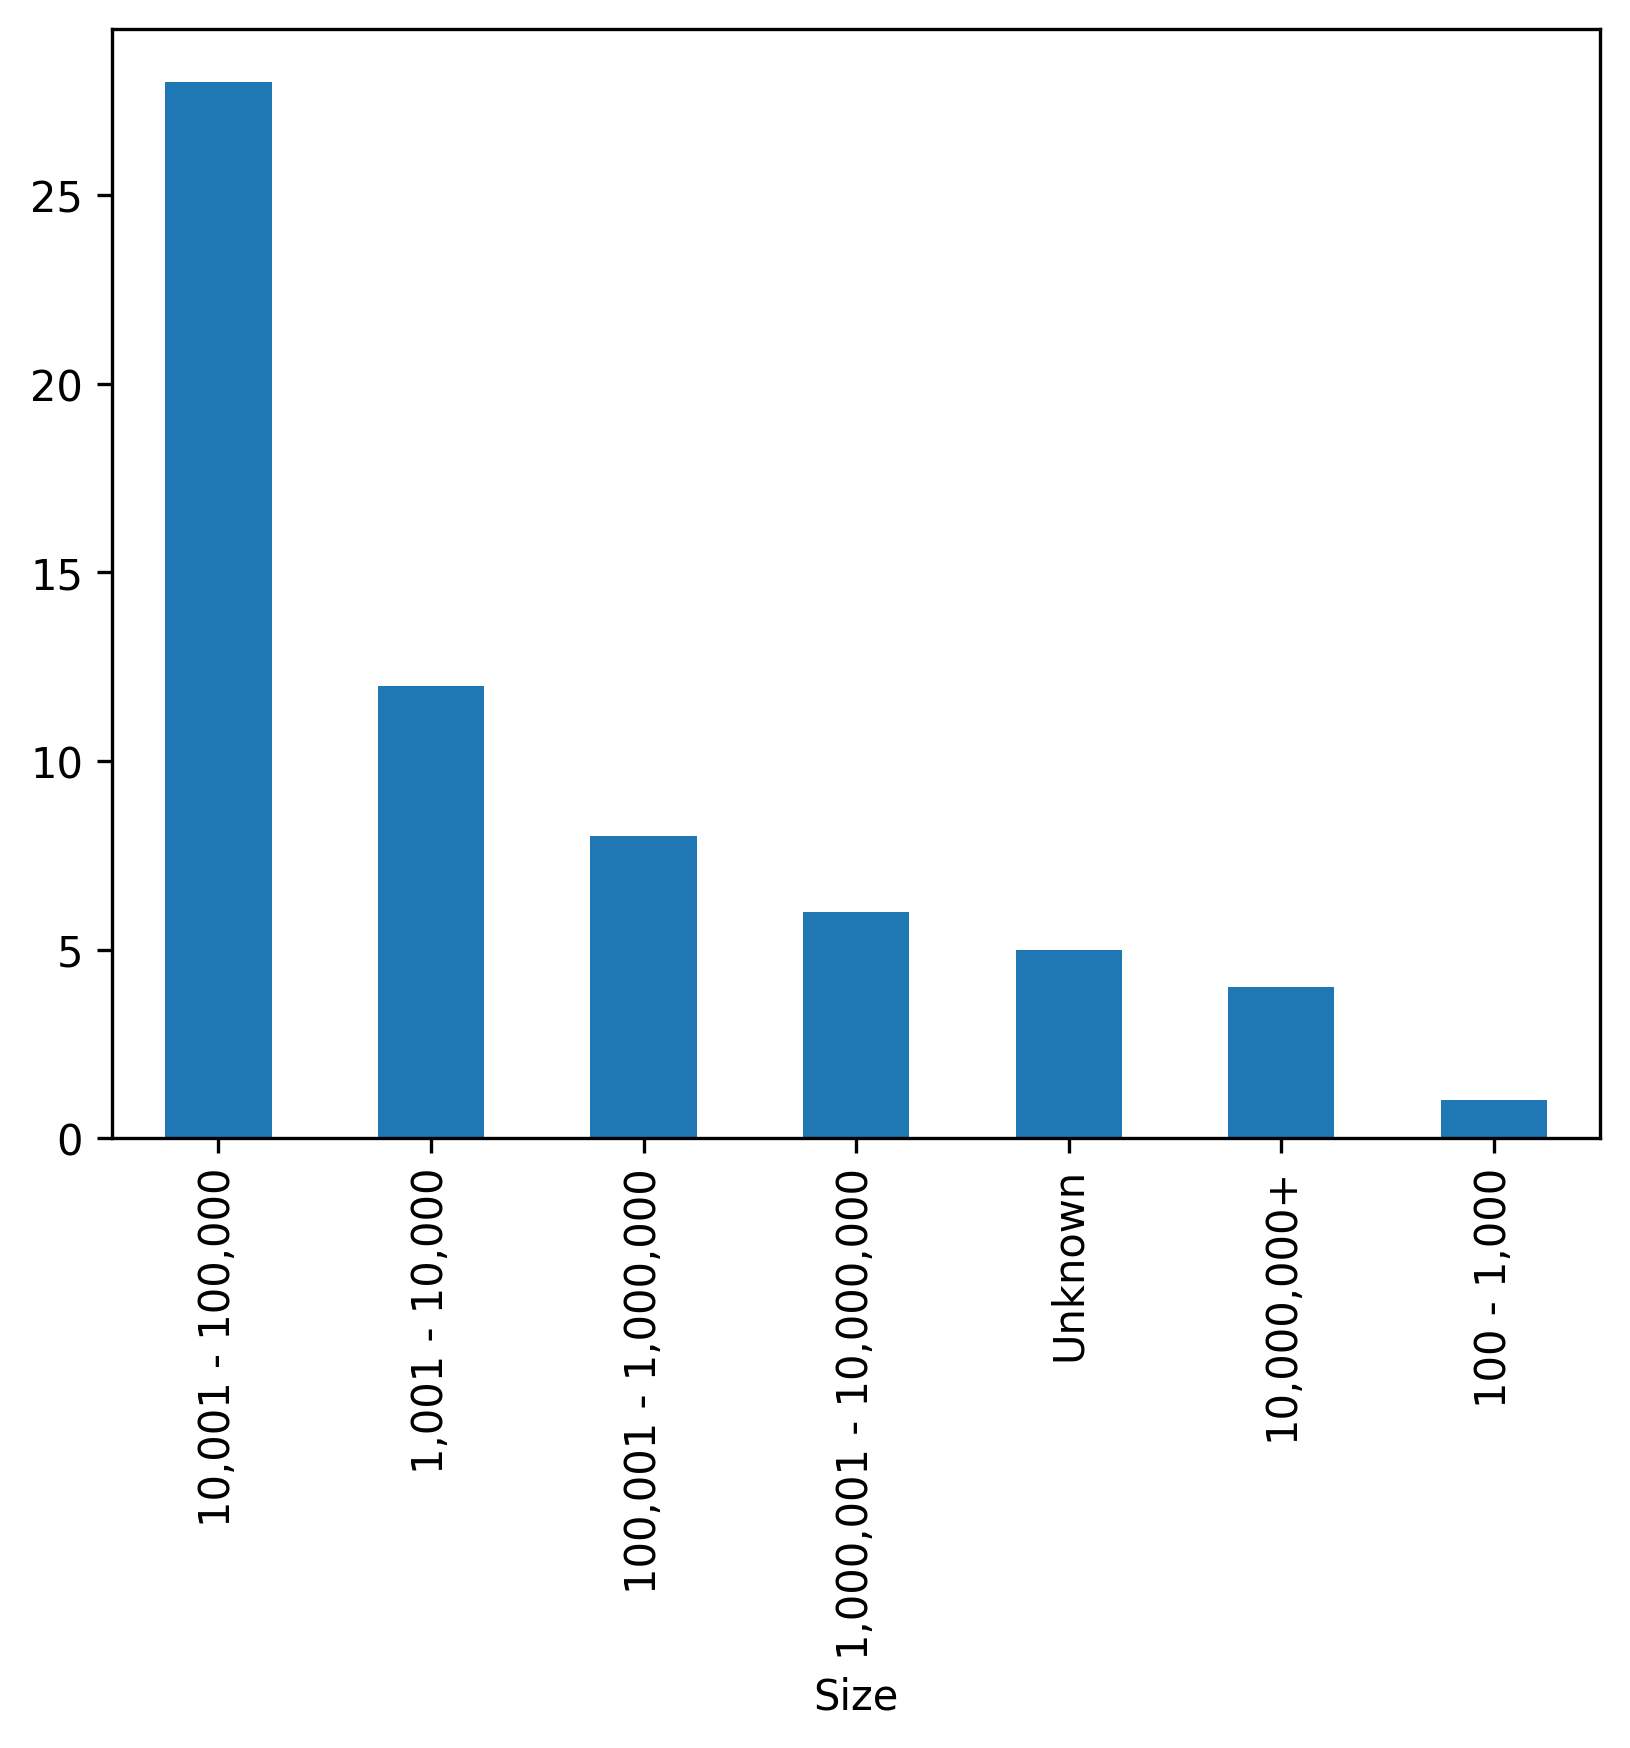

In [90]:
gov_df['Size'].value_counts().plot(kind='bar')

In [91]:
size_order = [
    '100 - 1,000',
    '1,001 - 10,000',
    '10,001 - 100,000',
    '100,001 - 1,000,000',
    '1,000,001 - 10,000,000',
    '10,000,000+',
    'Unknown'
]

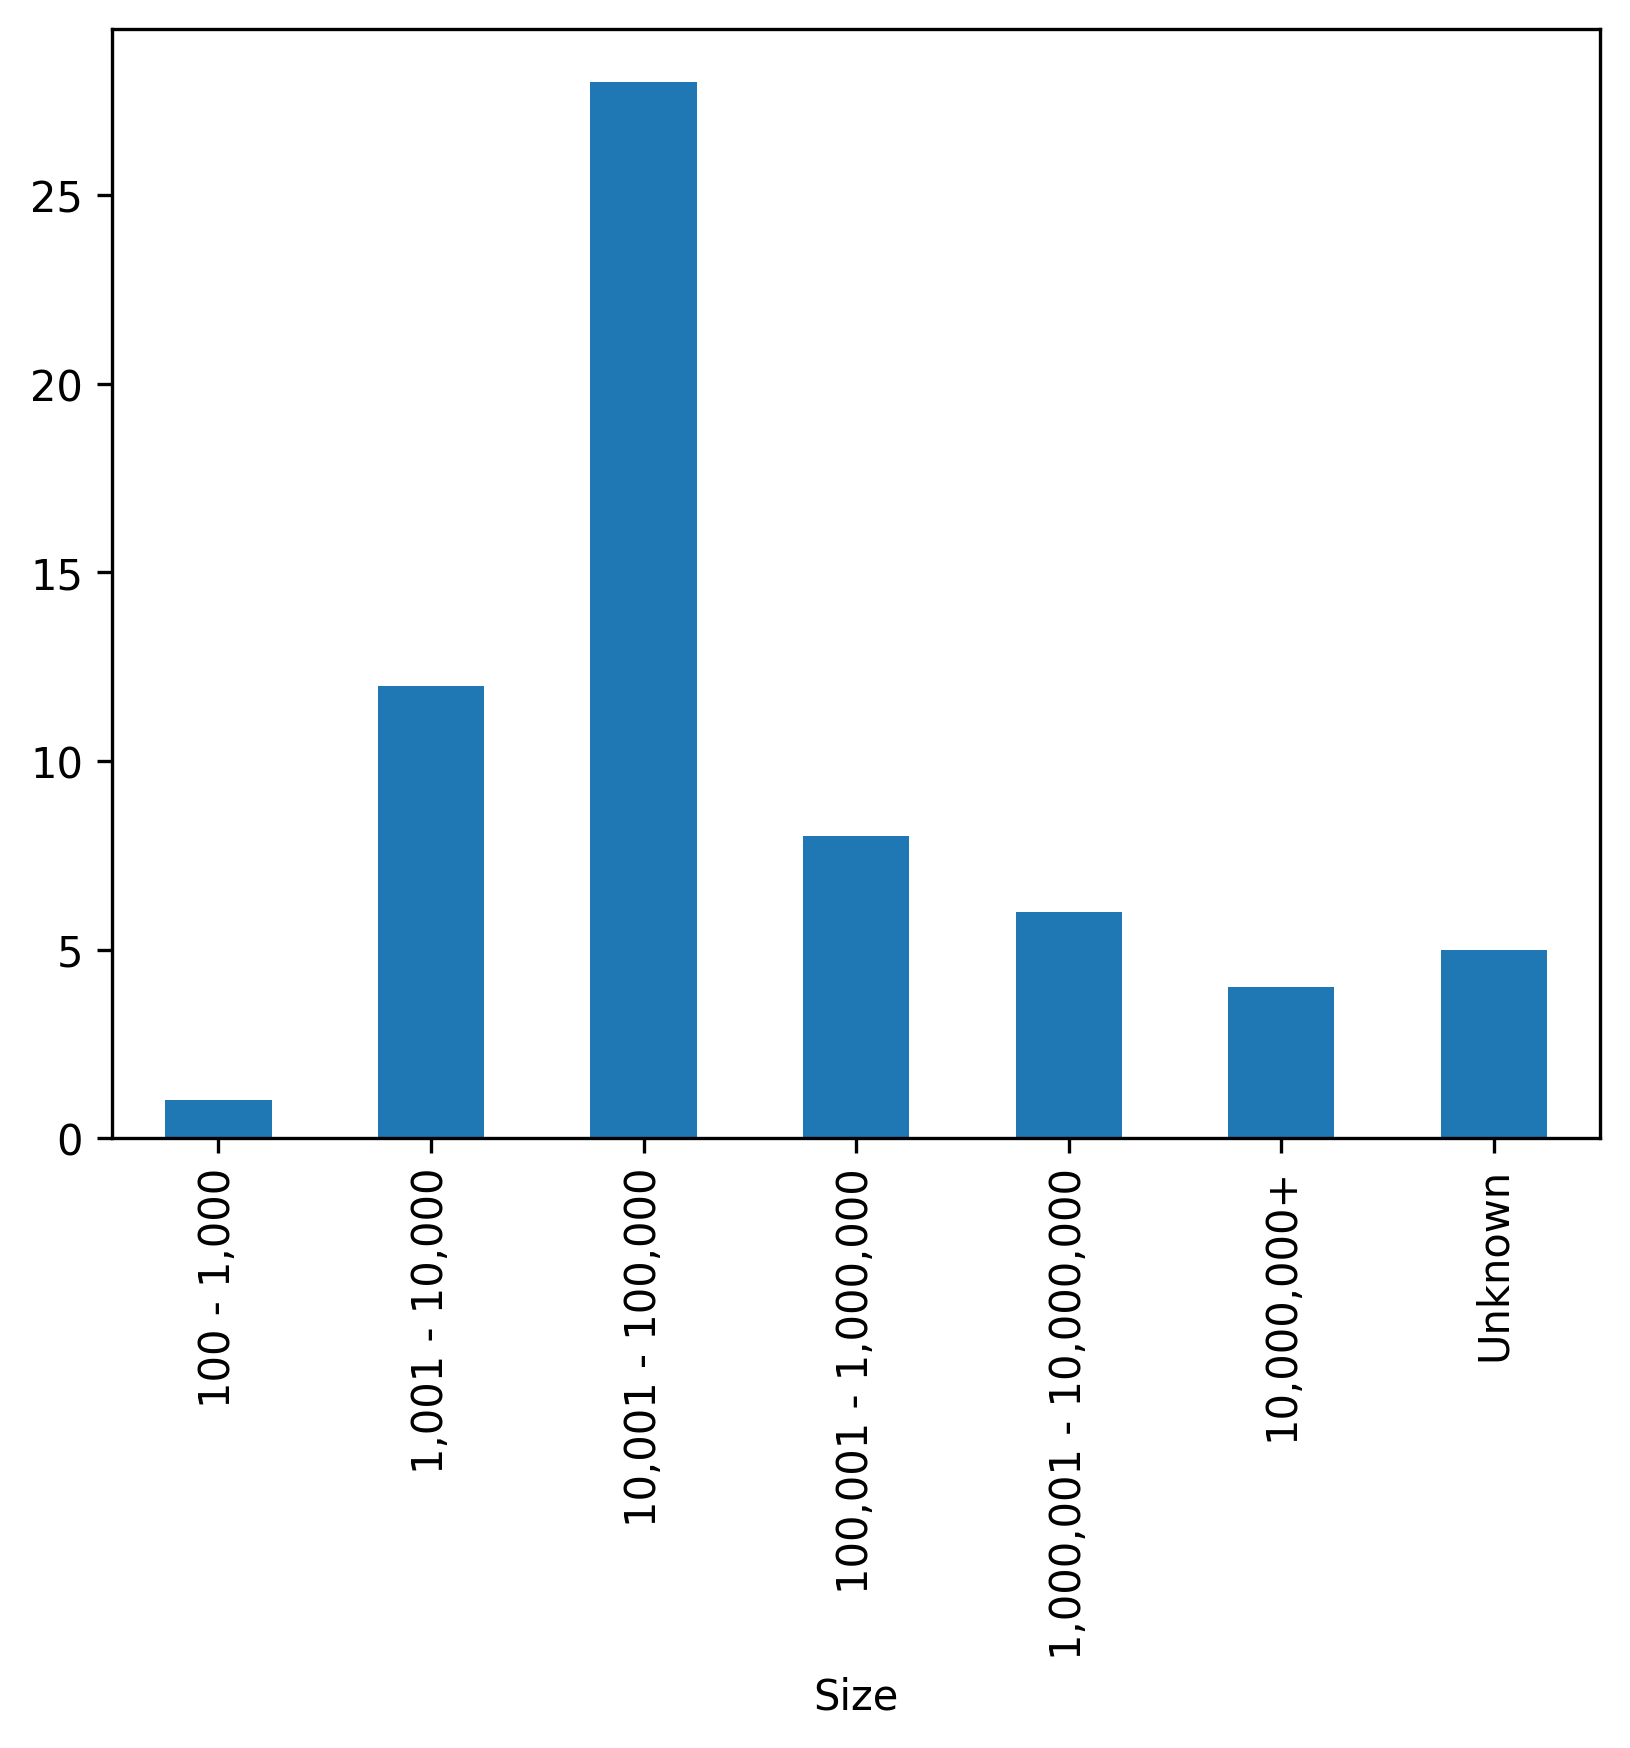

In [92]:
gov_df['Size'].value_counts().loc[size_order].plot.bar()

plt.savefig('fig/communities_histogram_size.png')

In [28]:
gov_df['Size']

0             1,001 - 10,000
1        100,001 - 1,000,000
2           10,001 - 100,000
3           10,001 - 100,000
4                    Unknown
5             1,001 - 10,000
6        100,001 - 1,000,000
7        100,001 - 1,000,000
8           10,001 - 100,000
9        100,001 - 1,000,000
10          10,001 - 100,000
11               10,000,000+
12                   Unknown
13          10,001 - 100,000
14          10,001 - 100,000
15          10,001 - 100,000
16          10,001 - 100,000
17    1,000,001 - 10,000,000
18    1,000,001 - 10,000,000
19            1,001 - 10,000
20            1,001 - 10,000
21          10,001 - 100,000
22          10,001 - 100,000
23          10,001 - 100,000
24          10,001 - 100,000
25          10,001 - 100,000
26          10,001 - 100,000
27                   Unknown
28          10,001 - 100,000
29          10,001 - 100,000
30    1,000,001 - 10,000,000
31          10,001 - 100,000
32            1,001 - 10,000
33                       NaN
34            

### Geography 

In [29]:
gov_df['Geography'].value_counts()

Geography
Europe South, Italy                    8
North America                          6
Europe West                            5
Middle East                            4
Europe East                            3
Asia Southeast                         3
Asia Southeast                         2
Central America, Mexico                2
Europe South, Greece                   2
Central America                        2
Asia Central                           1
Asia, Japan                            1
Asia, North-eastern India              1
Africa North, Algeria                  1
Africa South                           1
Asia, Southwestern China               1
Africa West, Niger Delta               1
South America, Brazil                  1
North America, Louisiana               1
Asia Southeast, Bali                   1
Asia, India                            1
Middle East MENA                       1
Oceania                                1
Asia, India (northeast)                1
Africa

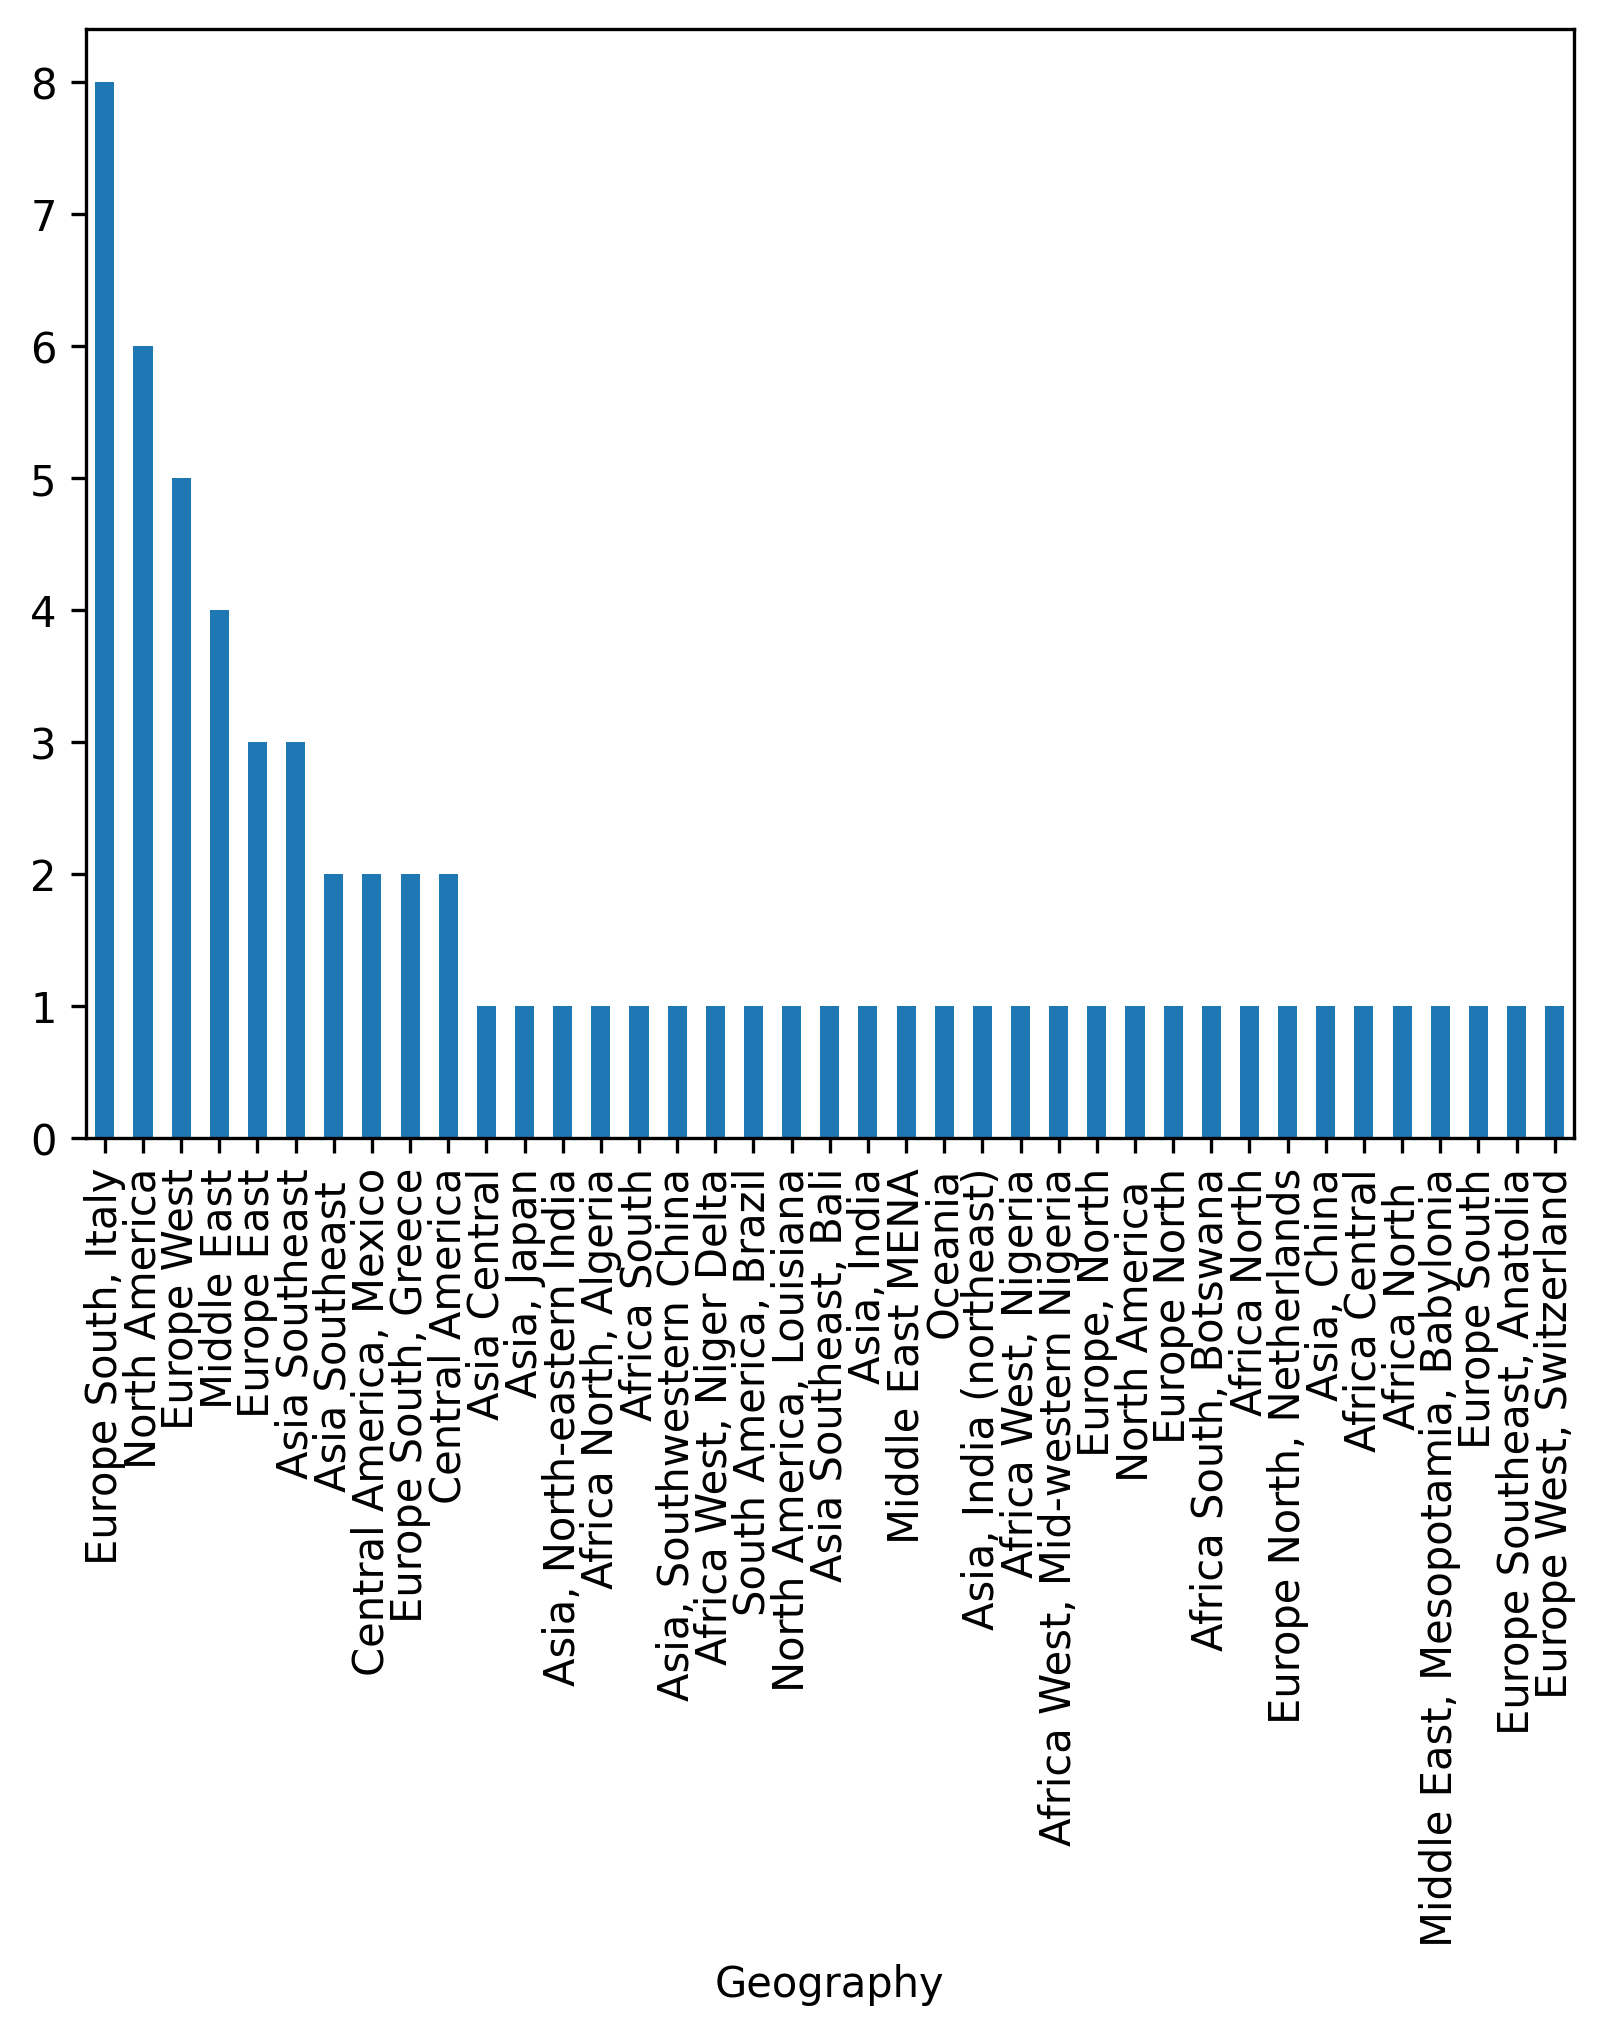

In [95]:
gov_df['Geography'].value_counts().plot(kind='bar')

plt.savefig('fig/communities_histogram_geography.png')

In [31]:
"""
- Africa
- Europe
- Asia
- Middle East
- North America
- Central America
- South America
- Oceania
"""

'\n- Africa\n- Europe\n- Asia\n- Middle East\n- North America\n- Central America\n- South America\n- Oceania\n'

In [32]:
gov_df['Geography']

0                            Africa South
1                            Europe North
2                         Asia Southeast 
3                             Europe West
4                             Middle East
5              Europe Southeast, Anatolia
6                            Europe South
7                 Central America, Mexico
8     Middle East, Mesopotamia, Babylonia
9                           Africa North 
10                         Africa Central
11                            Asia, China
12                            Europe East
13                            Europe West
14                            Europe West
15              Europe North, Netherlands
16                            Middle East
17                           Africa North
18                            Europe West
19                    Europe South, Italy
20                 Africa South, Botswana
21                    Europe South, Italy
22                    Europe South, Italy
23                   Europe South,

### Geography 

In [33]:
gov_df.head()

,Name,Institutions,Mechanism,Culture/Values/Norms,Notes,Time span,Time span: Start,Time span: End,Geography,Size,Source,Metanotes,Heterogeneity,FC comments,expert check,mechanisms_include_negotiation,mechanisms_include_meritocracy,mechanisms_include_suspension_expulsion_ostracism_proscription,mechanisms_include_secret_ballot,mechanisms_include_age_boundaries,mechanisms_include_vote_by_proxy,mechanisms_include_voting,mechanisms_include_mandate,mechanisms_include_lobbying,mechanisms_include_blood_relations,mechanisms_include_fines,mechanisms_include_representation,mechanisms_include_consensus,mechanisms_include_criticism_mocking_joking,mechanisms_include_magistrate_official,mechanisms_include_word_of_mouth,mechanisms_include_consultation,mechanisms_include_checks_and_balances,mechanisms_include_corporal_punishment_violence_against_perpetrator,mechanisms_include_life_appointment,mechanisms_include_forced_labour,mechanisms_include_council_central_,mechanisms_include_co-optation,mechanisms_include_paying_damages_compensation,mechanisms_include_unanimity,mechanisms_include_kingchief-as-figurehead,mechanisms_include_deliberation,mechanisms_include_seizing_of_property,mechanisms_include_autocratic_leader_chief_bound,mechanisms_include_plurality_voting,mechanisms_include_leader_first_among_equals,mechanisms_include_monitoring,mechanisms_include_reputational_risk,mechanisms_include_appeal,mechanisms_include_power_fluidity,mechanisms_include_graduated_sanctions,mechanisms_include_petition,mechanisms_include_delegation,mechanisms_include_vote_by_show_of_hands,mechanisms_include_temporary_position_of_power_term_limits,mechanisms_include_patronage_for_office,mechanisms_include_self-help,mechanisms_include_ratification_acclamation_only,mechanisms_include_rule_of_law,mechanisms_include_civil_disobedience,mechanisms_include_assembly_central,mechanisms_include_supermajority,mechanisms_include_military_force,mechanisms_include_arbitration,mechanisms_include_handshake,mechanisms_include_heredity,mechanisms_include_lottery_random_selection,mechanisms_include_matriarchy,mechanisms_include_bureaucracy,mechanisms_include_majority_voting,mechanisms_include_police,mechanisms_include_alliance,mechanisms_include_exit,mechanisms_include_board_committee,mechanisms_include_screening_process,mechanisms_include_jury_judge,mechanisms_include_dual-sex_political_system,mechanisms_include_remunerated_position,mechanisms_include_capital_punishment,mechanisms_include_mediation,mechanisms_include_public_meetings,mechanisms_include_balance_of_power,mechanisms_include_consent,mechanisms_include_property_requirement,mechanisms_include_destruction_of_property,mechanisms_include_turnover_rotation,mechanisms_include_litigation,mechanisms_include_quorum,mechanisms_include_tribunal_court_,mechanisms_include_frequent_and_or_regular_meetings,mechanisms_include_confederacy,mechanisms_include_assembly_local,mechanisms_include_council_local,mechanisms_include_judicial_review,mechanisms_include_induction_rite_ceremony,mechanisms_include_matrilineality,mechanisms_include_enfranchisement,mechanisms_include_popularity_,mechanisms_include_divine_right,mechanisms_include_payment_for_occupying_office,mechanisms_include_gerontocracy,mechanisms_include_oath,mechanisms_include_constitution,mechanisms_include_president_consul_chief_executive,mechanisms_include_veto,mechanisms_include_autocratic_leader_unbound,mechanisms_include_scrutiny_of_officials,mechanisms_include_open_political_unit,mechanisms_include_assembly_elite,mechanisms_include_agenda_setting,mechanisms_include_election,mechanisms_include_group_voting,mechanisms_include_coalition,mechanisms_include_dreaming,"Size: 100 - 1,000","Size: 1,001 - 10,000","Size: 10,001 - 100,000","Size: 100,001 - 1,000,000","Size: 100,000,001 - 10,000,000","Size: 10,000,000+",Size: Unknown,Geography: Africa South,Geography: Europe North,Geography: Asia Southeast,Geography: Europe West,Geography: Middle East,"Geography: Europe Southeast, Anatolia",Geo

In [34]:
gov_df['Region'].value_counts()

Region
Europe             24
Asia               13
Africa              9
North America       8
Middle East         6
Central America     4
South America       1
Oceania             1
Name: count, dtype: int64

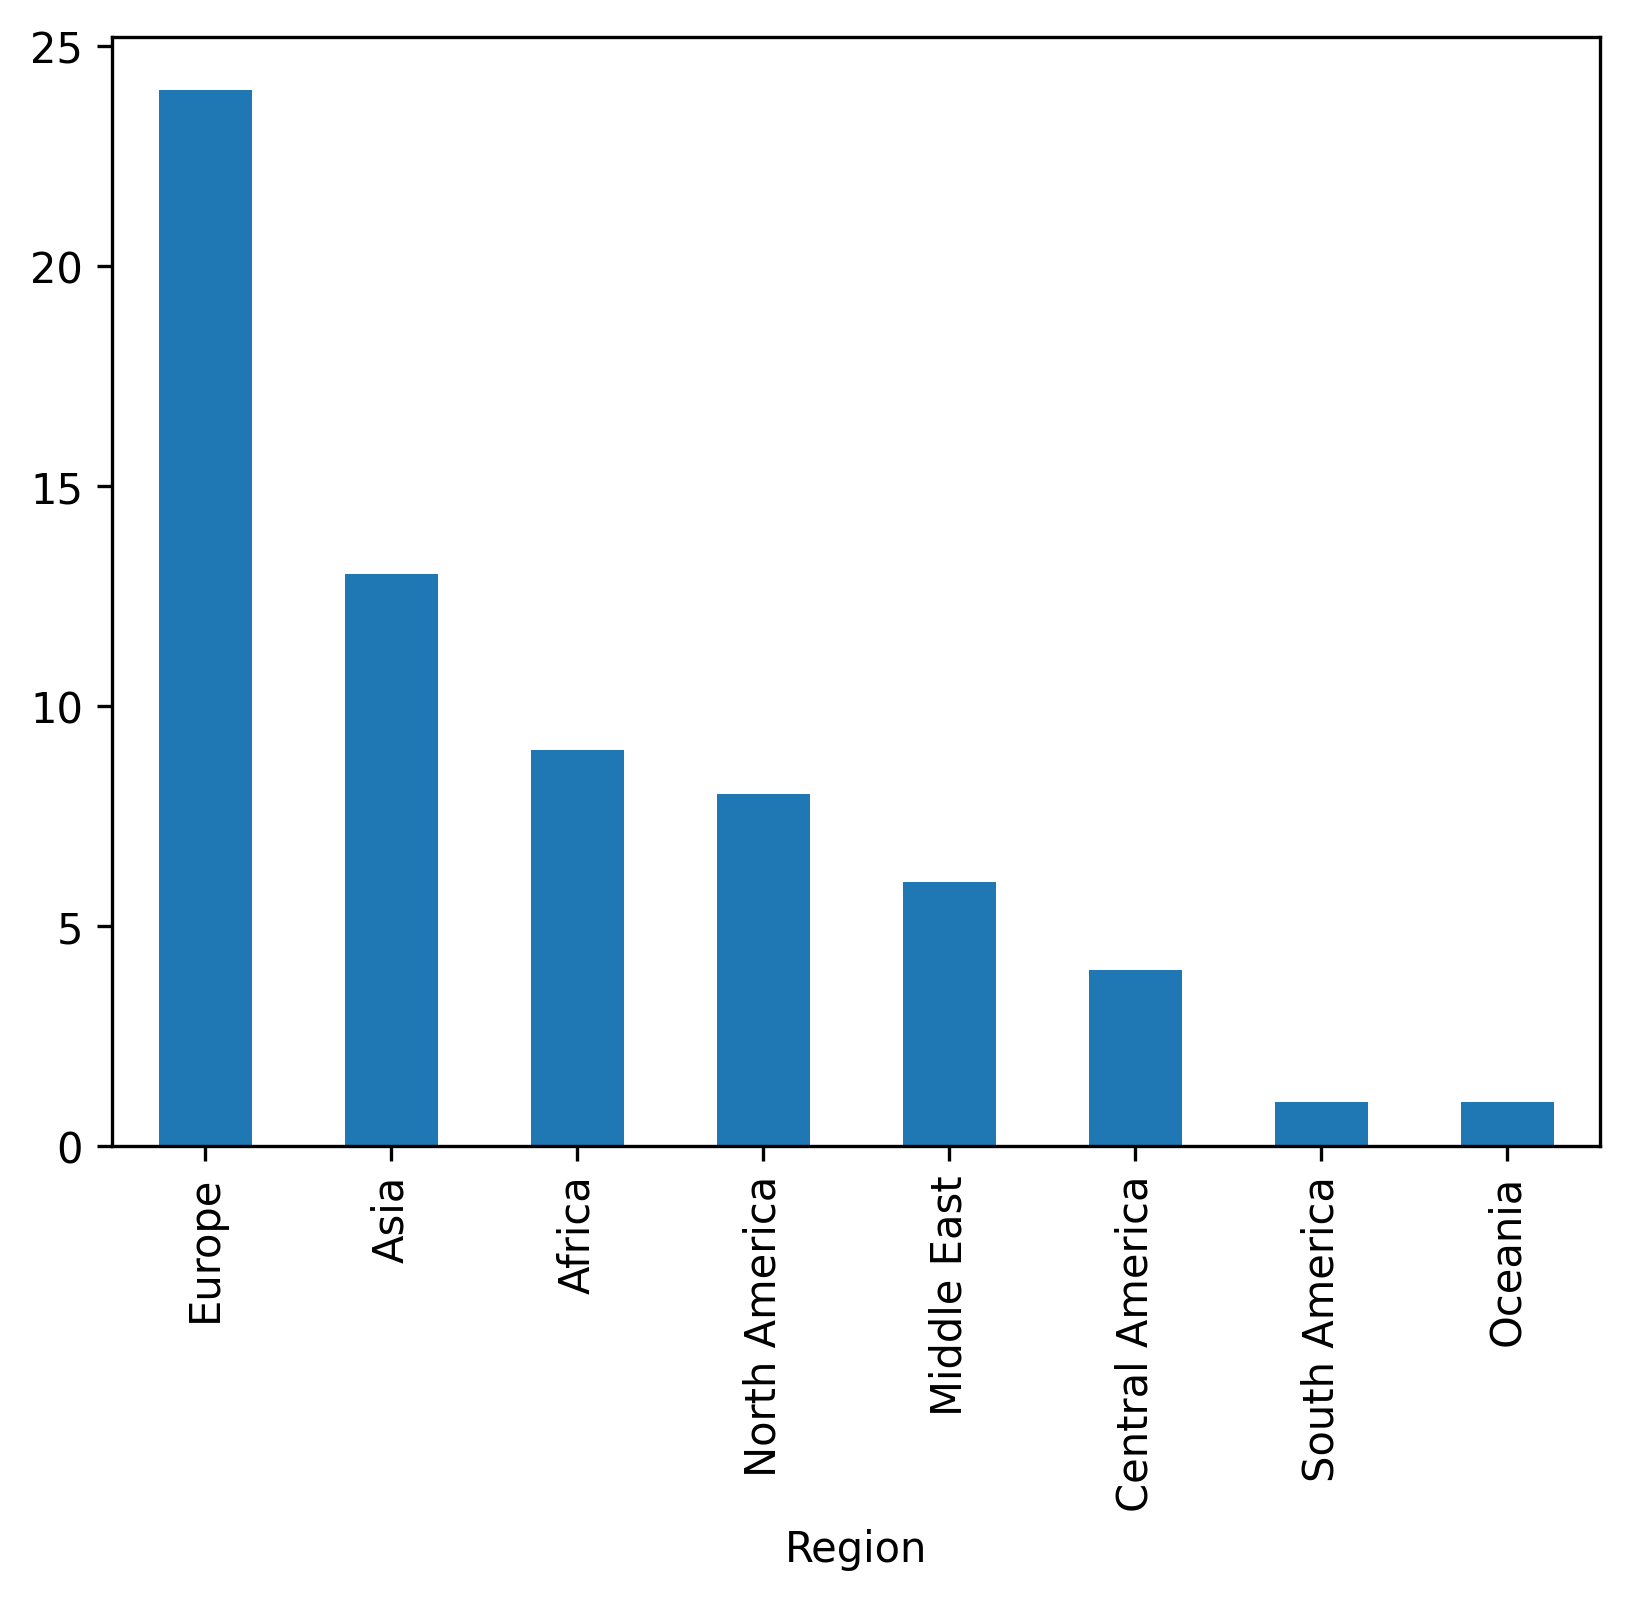

In [94]:
gov_df['Region'].value_counts().plot(kind='bar')

plt.savefig('fig/communities_histogram_region.png')

Notes:
- Overrepresentation of European communities
- Need more representation of Oceania and Pacific Islanders, South America, Central America! 

## Mapping geographies


### Prep world map data to match the regions we have 

In [36]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_95756/3744710904.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [37]:
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,8.899530e+05,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,5.800546e+07,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,6.032530e+05,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,1.851393e+07,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,3.358065e+07,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8.776109e+06,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,4.493871e+07,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [38]:
sorted(list(worldmap['name']))

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [39]:
central_america_countries = [
    'Belize',
    'Costa Rica',
    'El Salvador',
    'Guatemala',
    'Honduras',
    'Nicaragua',
    'Panama'
]

In [40]:
middle_east_countries = [
    'Cyprus',
    'Egypt',
    'Iran',
    'Iraq',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Oman',
    'Palestine',
    'Qatar',
    'Saudi Arabia',
    'Syria',
    'Turkey',
    'United Arab Emirates',
    'Yemen'
]

In [41]:
worldmap['name'].isin(central_america_countries)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [42]:
# Add region for Central America
worldmap.loc[(worldmap['name'].isin(central_america_countries)), 'continent'] = 'Central America'

In [43]:
worldmap.loc[(worldmap['continent'] == 'Central America')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
33,4246439.0,Central America,Panama,PAN,66800,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429..."
34,5047561.0,Central America,Costa Rica,CRI,61801,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
35,6545502.0,Central America,Nicaragua,NIC,12520,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
36,9746117.0,Central America,Honduras,HND,25095,"POLYGON ((-83.14722 14.99583, -83.48999 15.016..."
37,6453553.0,Central America,El Salvador,SLV,27022,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."
38,16604026.0,Central America,Guatemala,GTM,76710,"POLYGON ((-92.22775 14.53883, -92.20323 14.830..."
39,390353.0,Central America,Belize,BLZ,1879,"POLYGON ((-89.14308 17.80832, -89.15091 17.955..."


In [44]:
# Add region for Middle East
worldmap.loc[(worldmap['name'].isin(middle_east_countries)), 'continent'] = 'Middle East'

In [45]:
worldmap.loc[(worldmap['continent'] == 'Middle East')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
76,9053300.0,Middle East,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6855713.0,Middle East,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4685306.0,Middle East,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10101694.0,Middle East,Jordan,JOR,44502,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,9770529.0,Middle East,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2832067.0,Middle East,Qatar,QAT,175837,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."
86,4207083.0,Middle East,Kuwait,KWT,134628,"POLYGON ((47.97452 29.97582, 48.18319 29.53448..."
87,39309783.0,Middle East,Iraq,IRQ,234094,"POLYGON ((39.19547 32.16101, 38.79234 33.37869..."
88,4974986.0,Middle East,Oman,OMN,76331,"MULTIPOLYGON (((55.20834 22.70833, 55.23449 23..."
107,82913906.0,Middle East,Iran,IRN,453996,"POLYGON ((48.56797 29.92678, 48.01457 30.45246..."


In [46]:
worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

#### Merge regions on world map

In [47]:
region_map = gpd.GeoDataFrame(columns=['Region', 'geometry'])

In [48]:
region_map

,Region,geometry


In [49]:
worldmap.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [50]:
test_map = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union

In [51]:
print(test_map)

POLYGON ((-77.24256649444008 7.935278225125444, -77.43110795765699 7.638061224798734, -77.7534138658614 7.709839789252143, -77.88157141794525 7.223771267114785, -78.21493608266012 7.512254950384161, -78.42916073272607 8.052041123888927, -78.18209570993864 8.319182440621773, -78.4354652574657 8.38770538984079, -78.62212053090394 8.718124497915028, -79.12030717641375 8.996092027213024, -79.55787736684519 8.932374986197146, -79.76057817251005 8.5845150822244, -80.16448116730334 8.333315944853595, -80.38265906443962 8.298408514840432, -80.4806892564973 8.09030752200107, -80.00368994822716 7.547524115423372, -80.276670701809 7.419754136581716, -80.42115800649708 7.271571966984765, -80.8864009264208 7.220541490096537, -81.05954281281473 7.817921047390597, -81.18971574575795 7.64790558515034, -81.51951473664468 7.706610012233909, -81.72131120474447 8.108962714058435, -82.13144120962892 8.175392767769637, -82.39093441438257 8.29236237226229, -82.82008134635042 8.290863755725823, -82.8509580146

In [52]:
regions_list = list(gov_df['Region'].unique())

In [53]:
regions_list

['Africa',
 'Europe',
 'Asia',
 'Middle East',
 'Central America',
 'North America',
 'South America',
 'Oceania']

In [54]:
region_map['Region'] = regions_list

In [55]:
region_map

,Region,geometry
0,Africa,None
1,Europe,None
2,Asia,None
3,Middle East,None
4,Central America,None
5,North America,None
6,South America,None
7,Oceania,None


In [56]:
worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

In [57]:
region_map['geometry'].loc[region_map['Region'] == 'Africa'] = worldmap.loc[(worldmap['continent'] == 'Africa')].unary_union

In [58]:
region_map['geometry'].loc[region_map['Region'] == 'Europe'] = worldmap.loc[(worldmap['continent'] == 'Europe')].unary_union

In [59]:
region_map['geometry'].loc[region_map['Region'] == 'Asia'] = worldmap.loc[(worldmap['continent'] == 'Asia')].unary_union

In [60]:
region_map['geometry'].loc[region_map['Region'] == 'Middle East'] = worldmap.loc[(worldmap['continent'] == 'Middle East')].unary_union

In [61]:
region_map['geometry'].loc[region_map['Region'] == 'North America'] = worldmap.loc[(worldmap['continent'] == 'North America')].unary_union

In [62]:
region_map['geometry'].loc[region_map['Region'] == 'Central America'] = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union

In [63]:
region_map['geometry'].loc[region_map['Region'] == 'South America'] = worldmap.loc[(worldmap['continent'] == 'South America')].unary_union

In [64]:
region_map['geometry'].loc[region_map['Region'] == 'Oceania'] = worldmap.loc[(worldmap['continent'] == 'Oceania')].unary_union

In [65]:
region_map

,Region,geometry
0,Africa,"MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ..."
1,Europe,"MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ..."
2,Asia,"MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852..."
3,Middle East,"MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ..."
4,Central America,"POLYGON ((-77.243 7.935, -77.431 7.638, -77.75..."
5,North America,"MULTIPOLYGON (((-155.222 19.240, -155.542 19.0..."
6,South America,"MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4..."
7,Oceania,"MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9..."


In [66]:
region_counts = gov_df['Region'].value_counts().rename_axis('Region').reset_index(name='Count')

In [67]:
region_counts

,Region,Count
0,Europe,24
1,Asia,13
2,Africa,9
3,North America,8
4,Middle East,6
5,Central America,4
6,South America,1
7,Oceania,1


In [68]:
merged_regions = pd.merge(region_map, region_counts, on='Region')

In [69]:
merged_regions

,Region,geometry,Count
0,Africa,"MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...",9
1,Europe,"MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...",24
2,Asia,"MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...",13
3,Middle East,"MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...",6
4,Central America,"POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...",4
5,North America,"MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...",8
6,South America,"MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...",1
7,Oceania,"MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...",1


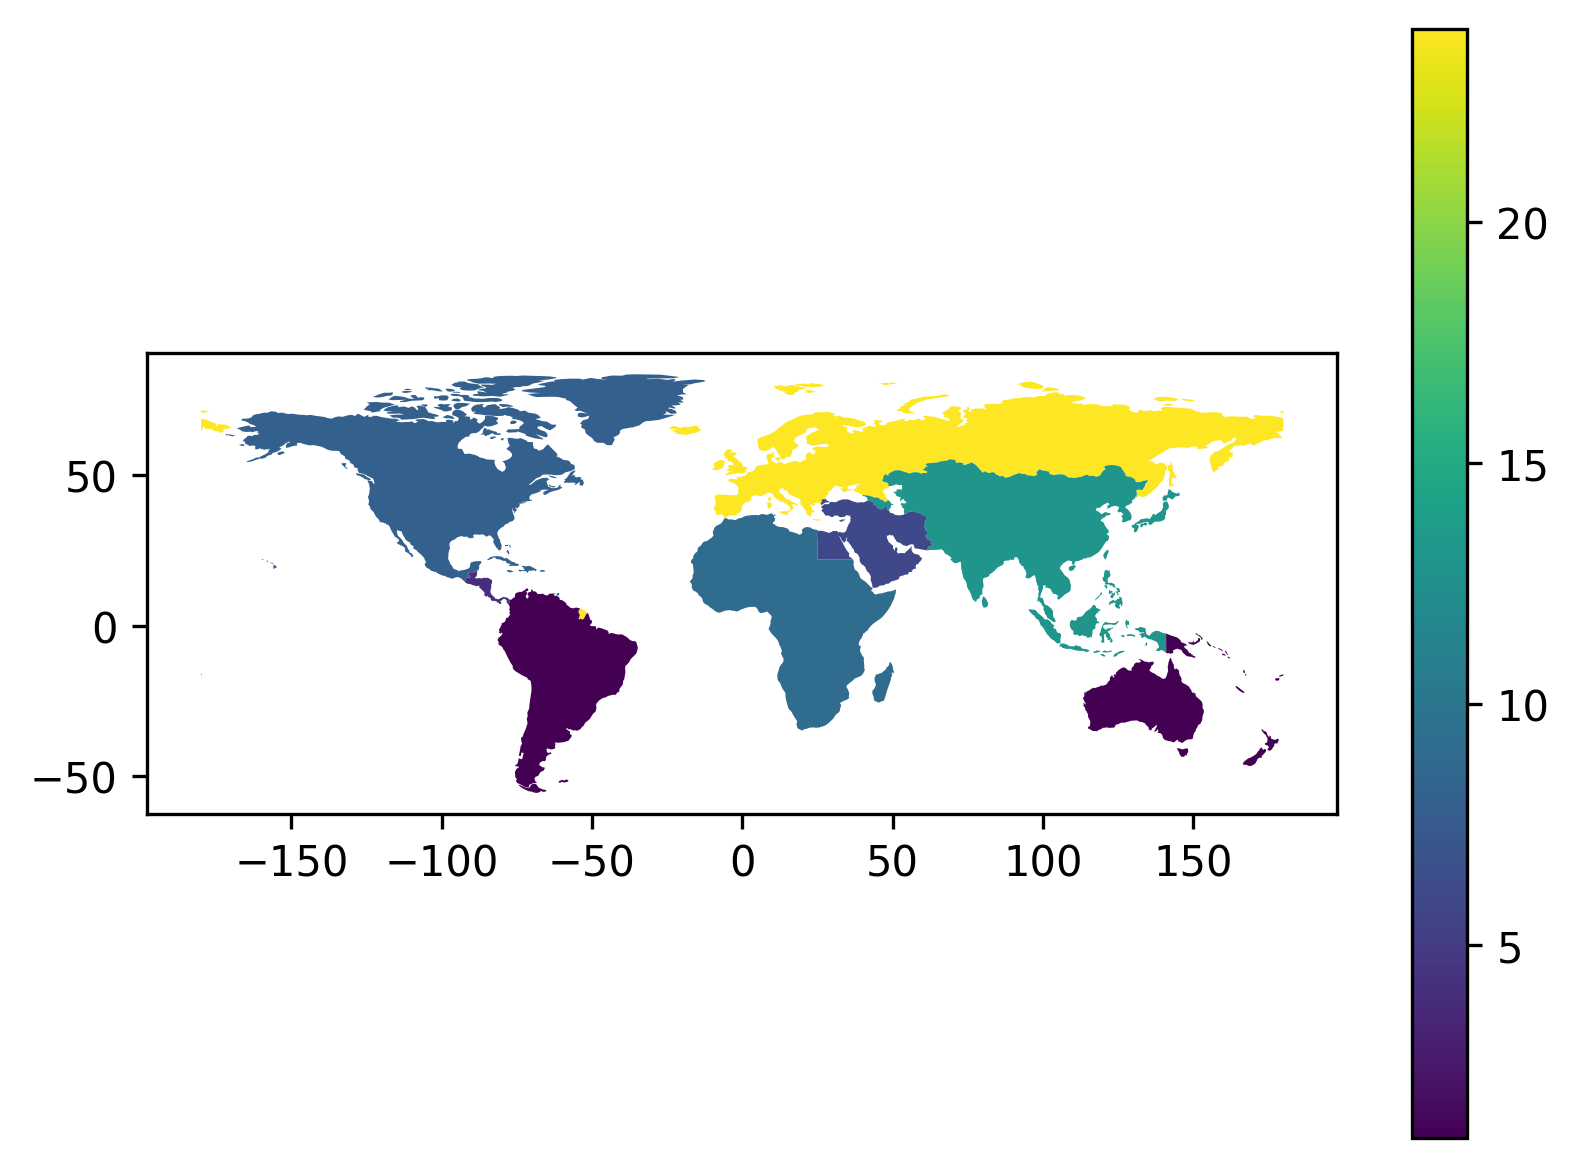

In [96]:
merged_regions.plot(column='Count', legend=True)

plt.savefig('fig/communities_map_region.png')

0            Annotation(17.7812, 5.71672, 'Africa\n9')
1           Annotation(78.6181, 60.0009, 'Europe\n24')
2             Annotation(93.0712, 32.9649, 'Asia\n13')
3       Annotation(44.0087, 28.8033, 'Middle East\n6')
4    Annotation(-86.0219, 13.199, 'Central America\...
5    Annotation(-92.2527, 57.1283, 'North America\n8')
6    Annotation(-60.8785, -15.4799, 'South America\...
7          Annotation(136.766, -25.3188, 'Oceania\n1')
dtype: object

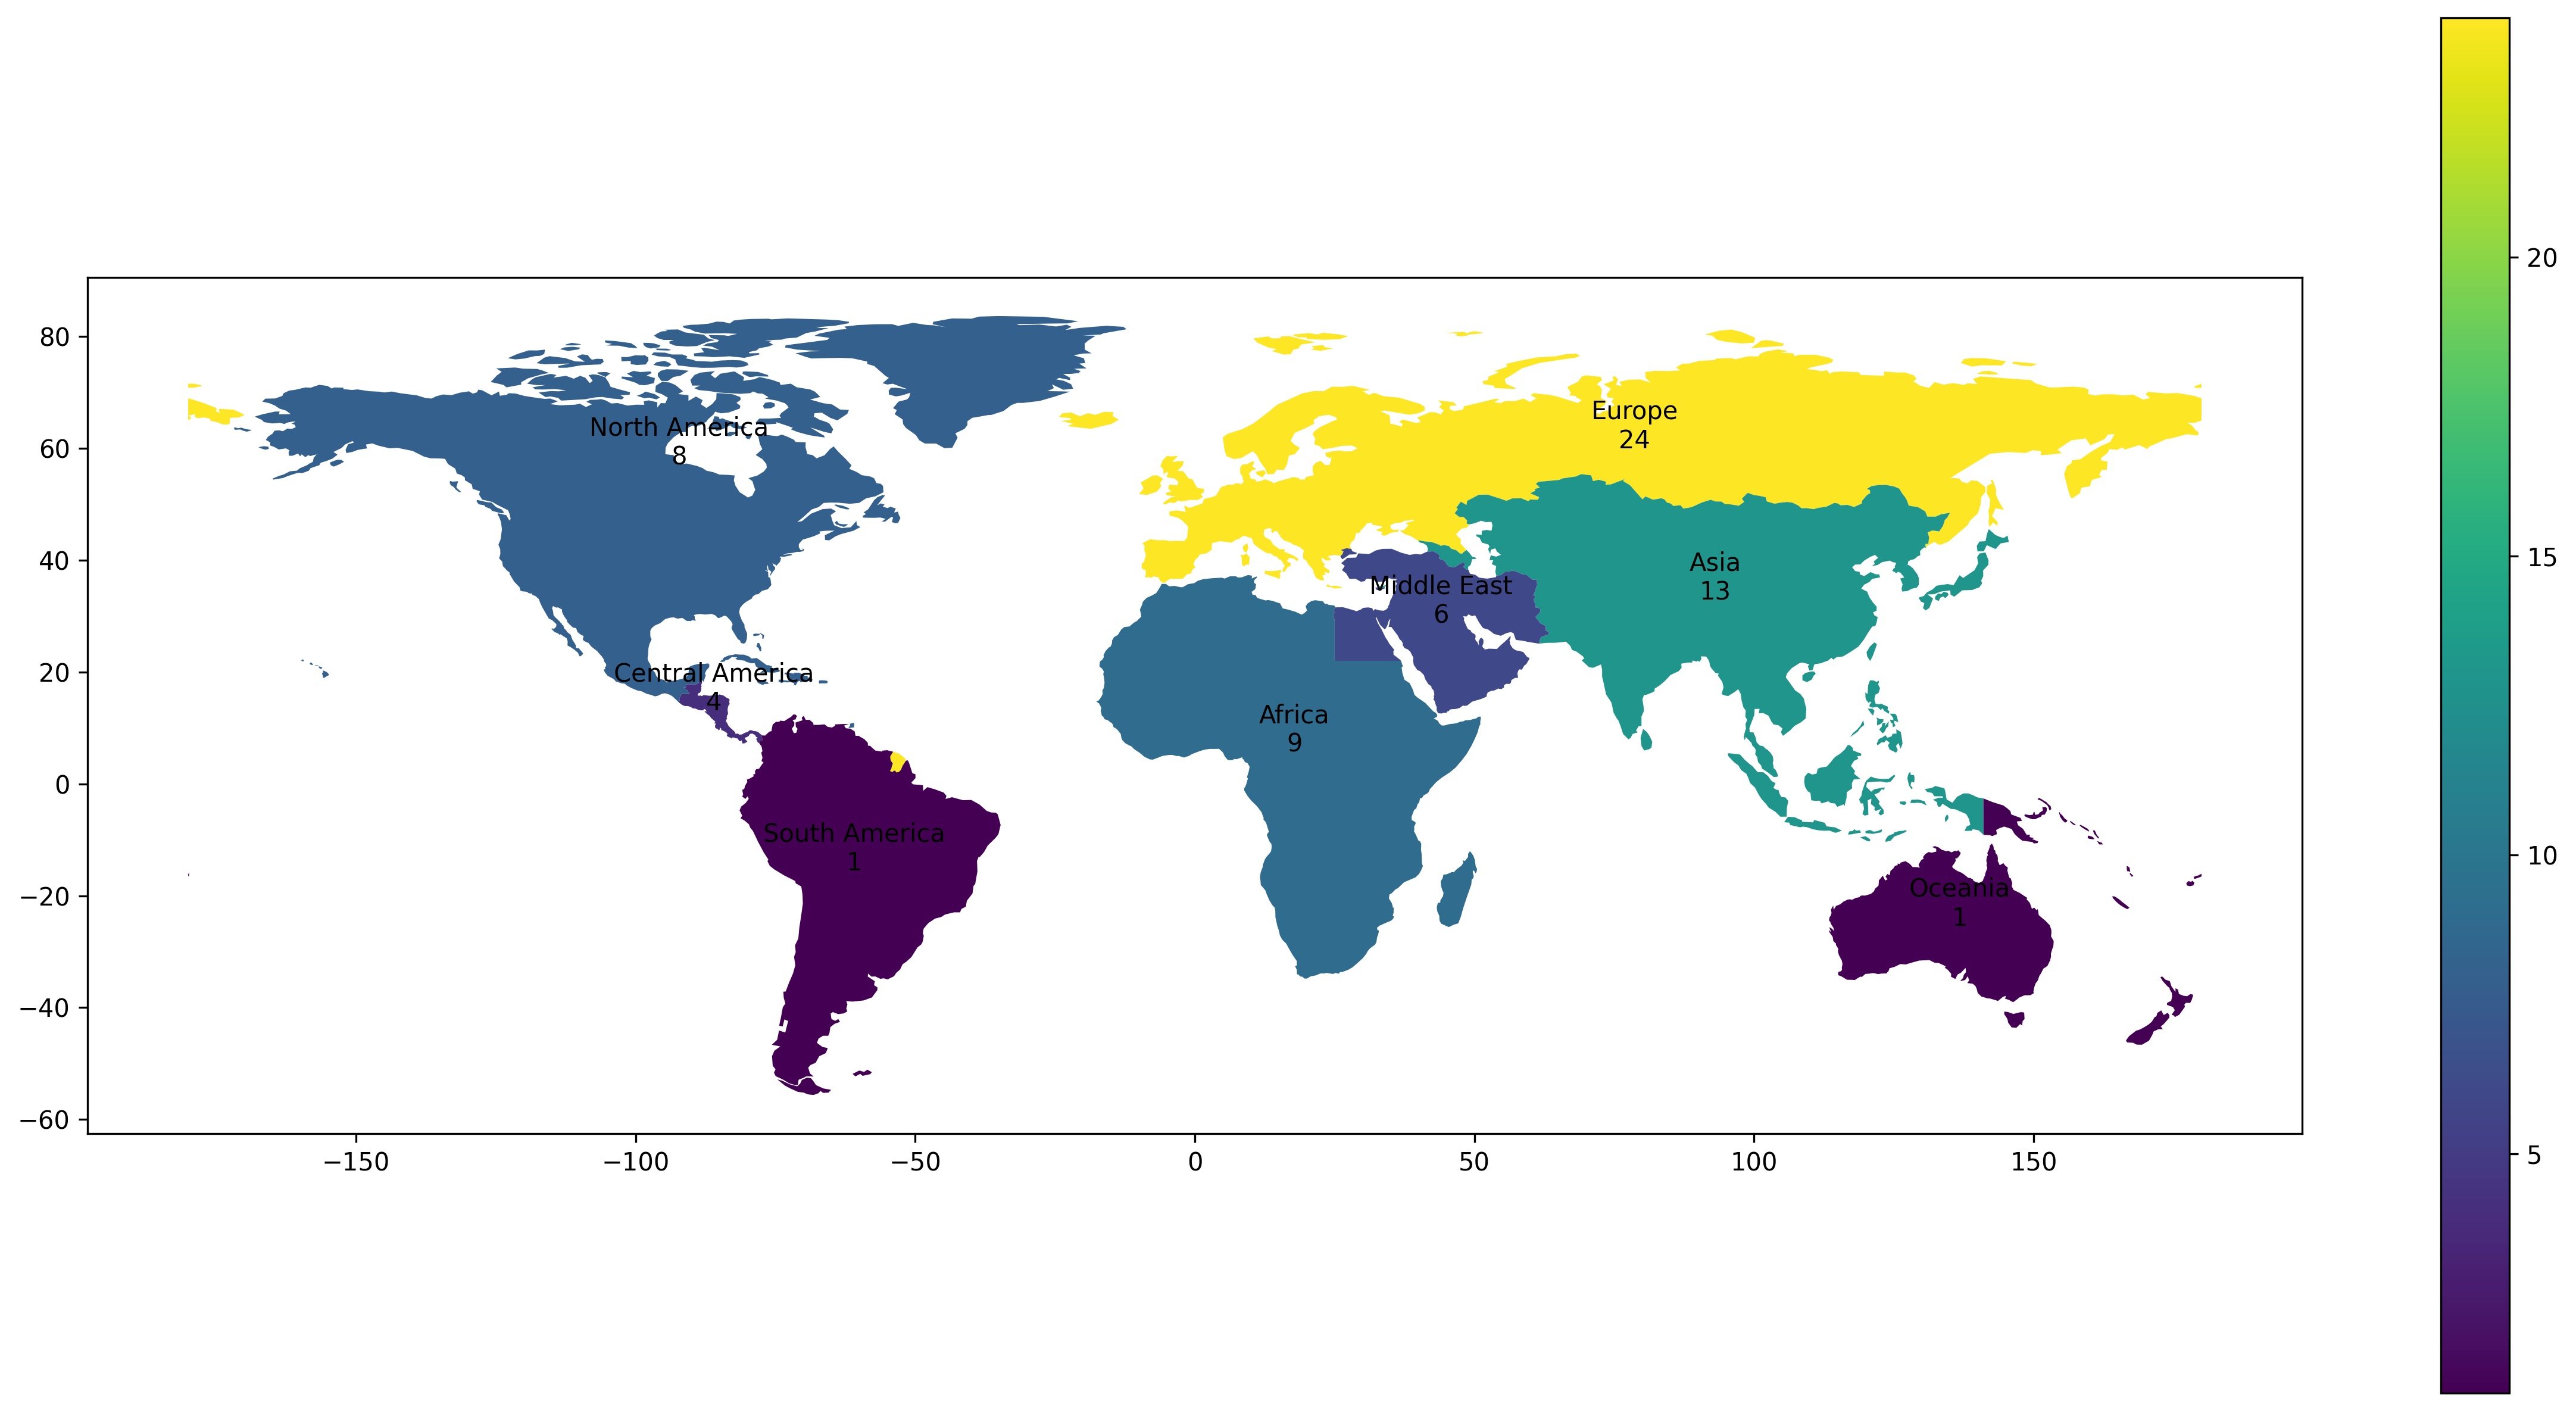

In [71]:
ax = merged_regions.plot(
    column='Count', 
    legend=True, 
    figsize=(20,10)
)

# Annotate
merged_regions.apply(lambda x: ax.annotate(text=x['Region'] + '\n' + str(x['Count']), xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

## Time Span

Note:
- Change Time span to "Time span: Start" and "Time span: Stop"

In [72]:
gov_df['Time span: Start'].value_counts()

Time span: Start
 1900    8
 1700    5
 1800    5
 900     5
 1200    3
 1100    3
 1000    3
 1300    3
 1500    3
 1600    2
-480     2
-600     2
-1200    1
-771     1
-510     1
 1081    1
-1550    1
-4100    1
-1800    1
 300     1
 0       1
-1500    1
 1400    1
 930     1
-1920    1
 1450    1
-508     1
-900     1
-400     1
-200     1
 400     1
-2700    1
-2400    1
-1894    1
Name: count, dtype: int64

<Axes: xlabel='Time span: Start'>

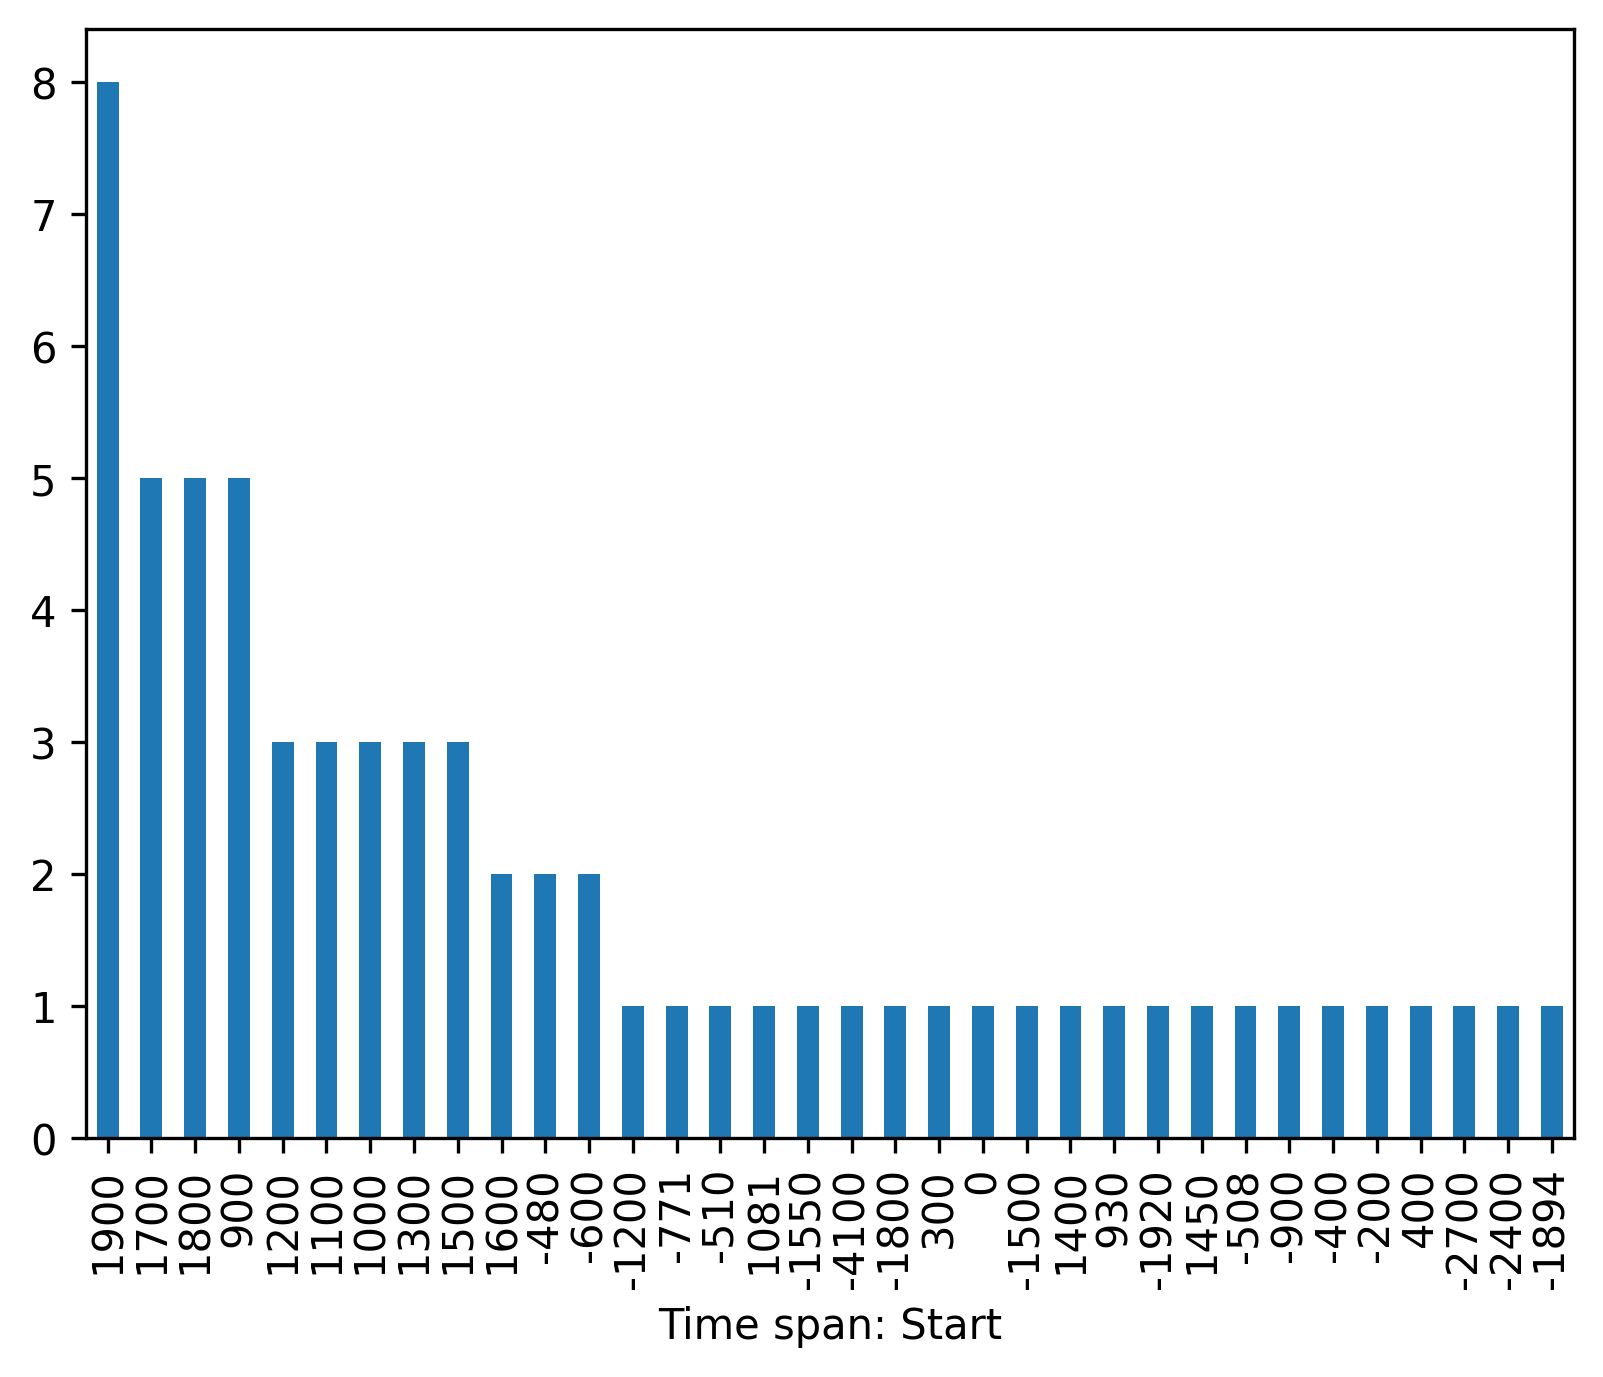

In [73]:
gov_df['Time span: Start'].value_counts().plot(kind='bar')

In [74]:
time_span_start_dates = gov_df['Time span: Start'].unique()

In [75]:
time_span_start_dates_order = sorted(time_span_start_dates)

In [76]:
time_span_start_dates_order

[-4100,
 -2700,
 -2400,
 -1920,
 -1894,
 -1800,
 -1550,
 -1500,
 -1200,
 -900,
 -771,
 -600,
 -510,
 -508,
 -480,
 -400,
 -200,
 0,
 300,
 400,
 900,
 930,
 1000,
 1081,
 1100,
 1200,
 1300,
 1400,
 1450,
 1500,
 1600,
 1700,
 1800,
 1900]

<Axes: xlabel='Time span: Start'>

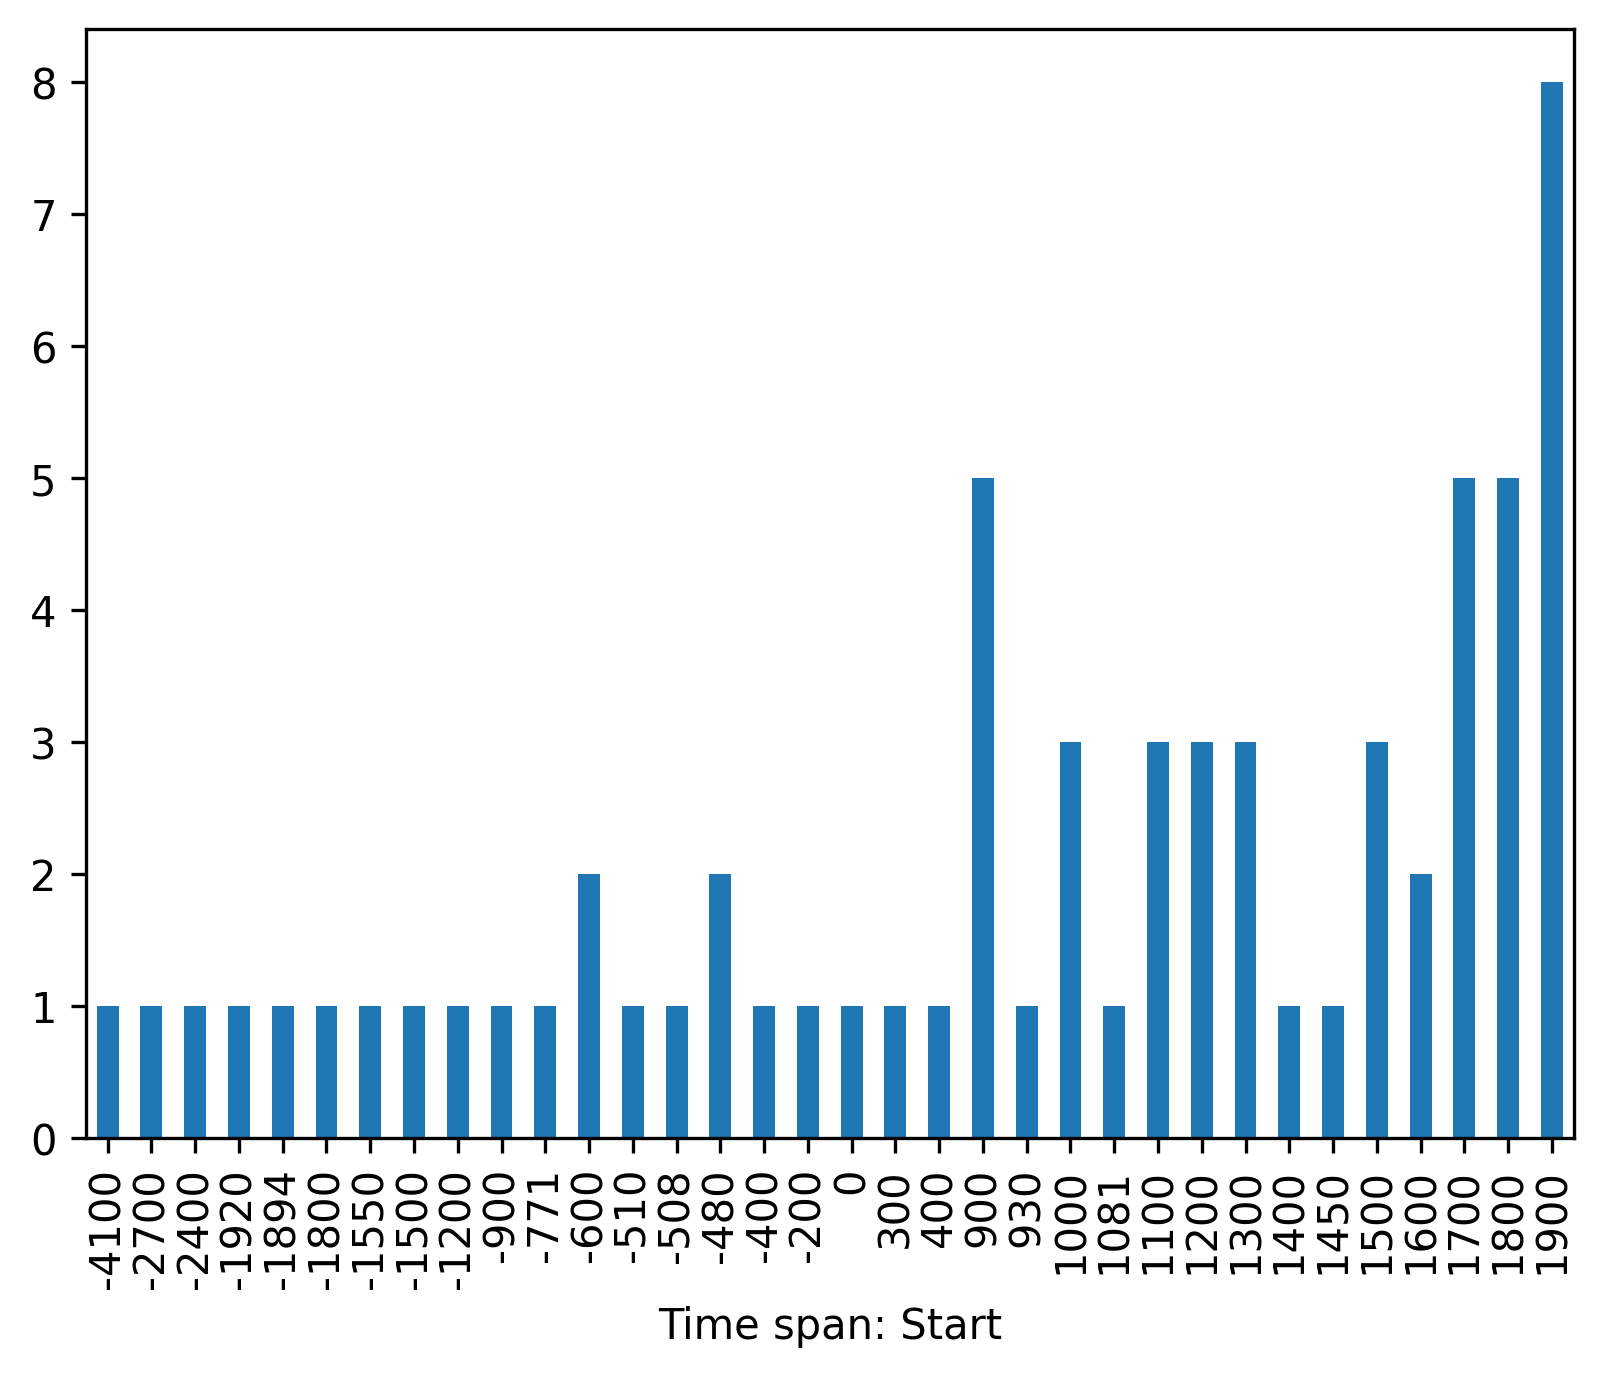

In [77]:
gov_df['Time span: Start'].value_counts().loc[time_span_start_dates_order].plot.bar()

In [78]:
gov_df['Time span: End'].value_counts()

Time span: End
 1900    12
 1800     6
 2023     5
 1600     5
-27       3
 1400     3
 2000     3
-300      2
 1300     2
 1200     2
-1760     1
 1521     1
 1560     1
-3300     1
 1406     1
 1262     1
 1700     1
 1804     1
-500      1
 1100     1
-200      1
 0        1
-1000     1
-2300     1
-700      1
-221      1
 1500     1
-100      1
-600      1
-322      1
-1800     1
 700      1
-1595     1
Name: count, dtype: int64

<Axes: xlabel='Time span: End'>

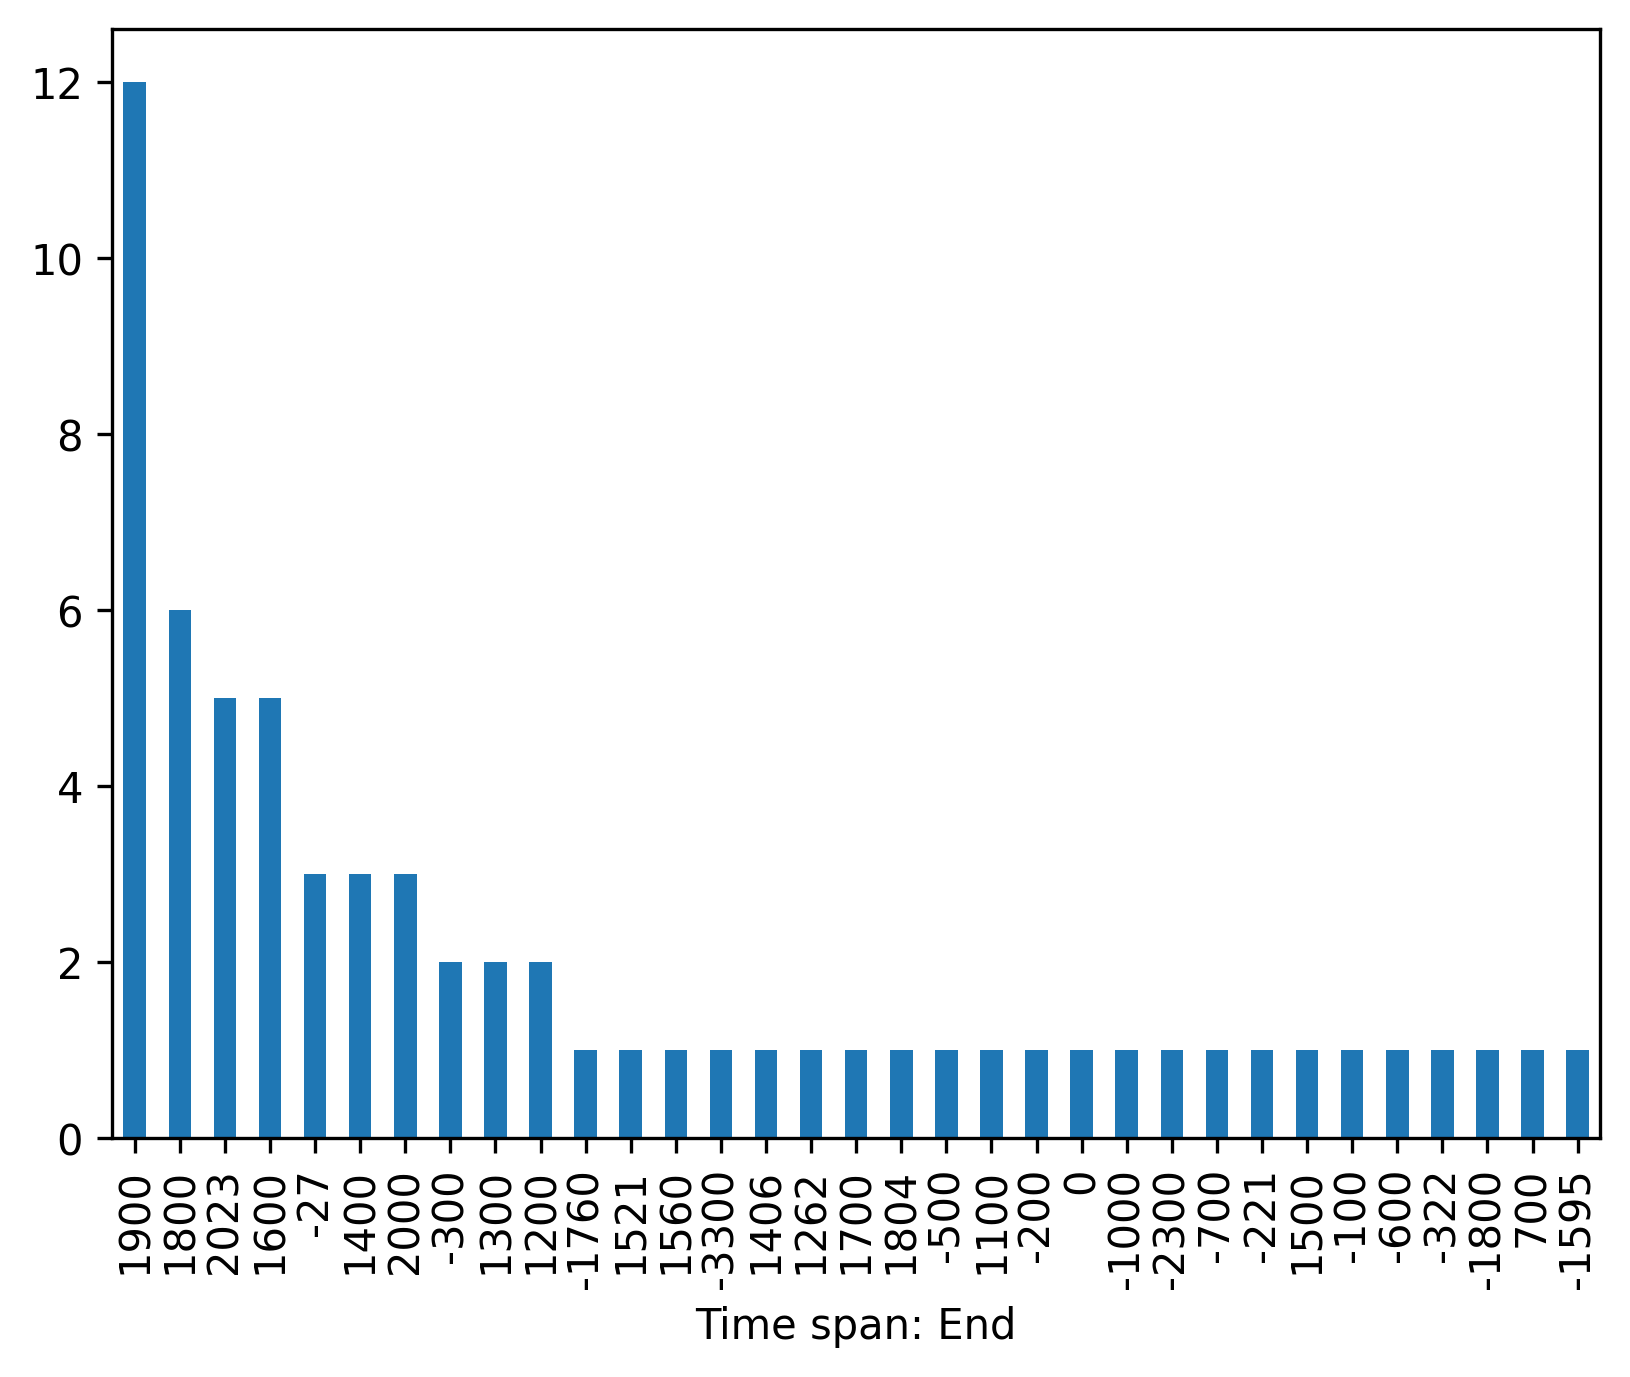

In [79]:
gov_df['Time span: End'].value_counts().plot(kind='bar')

<Axes: xlabel='Time span: End'>

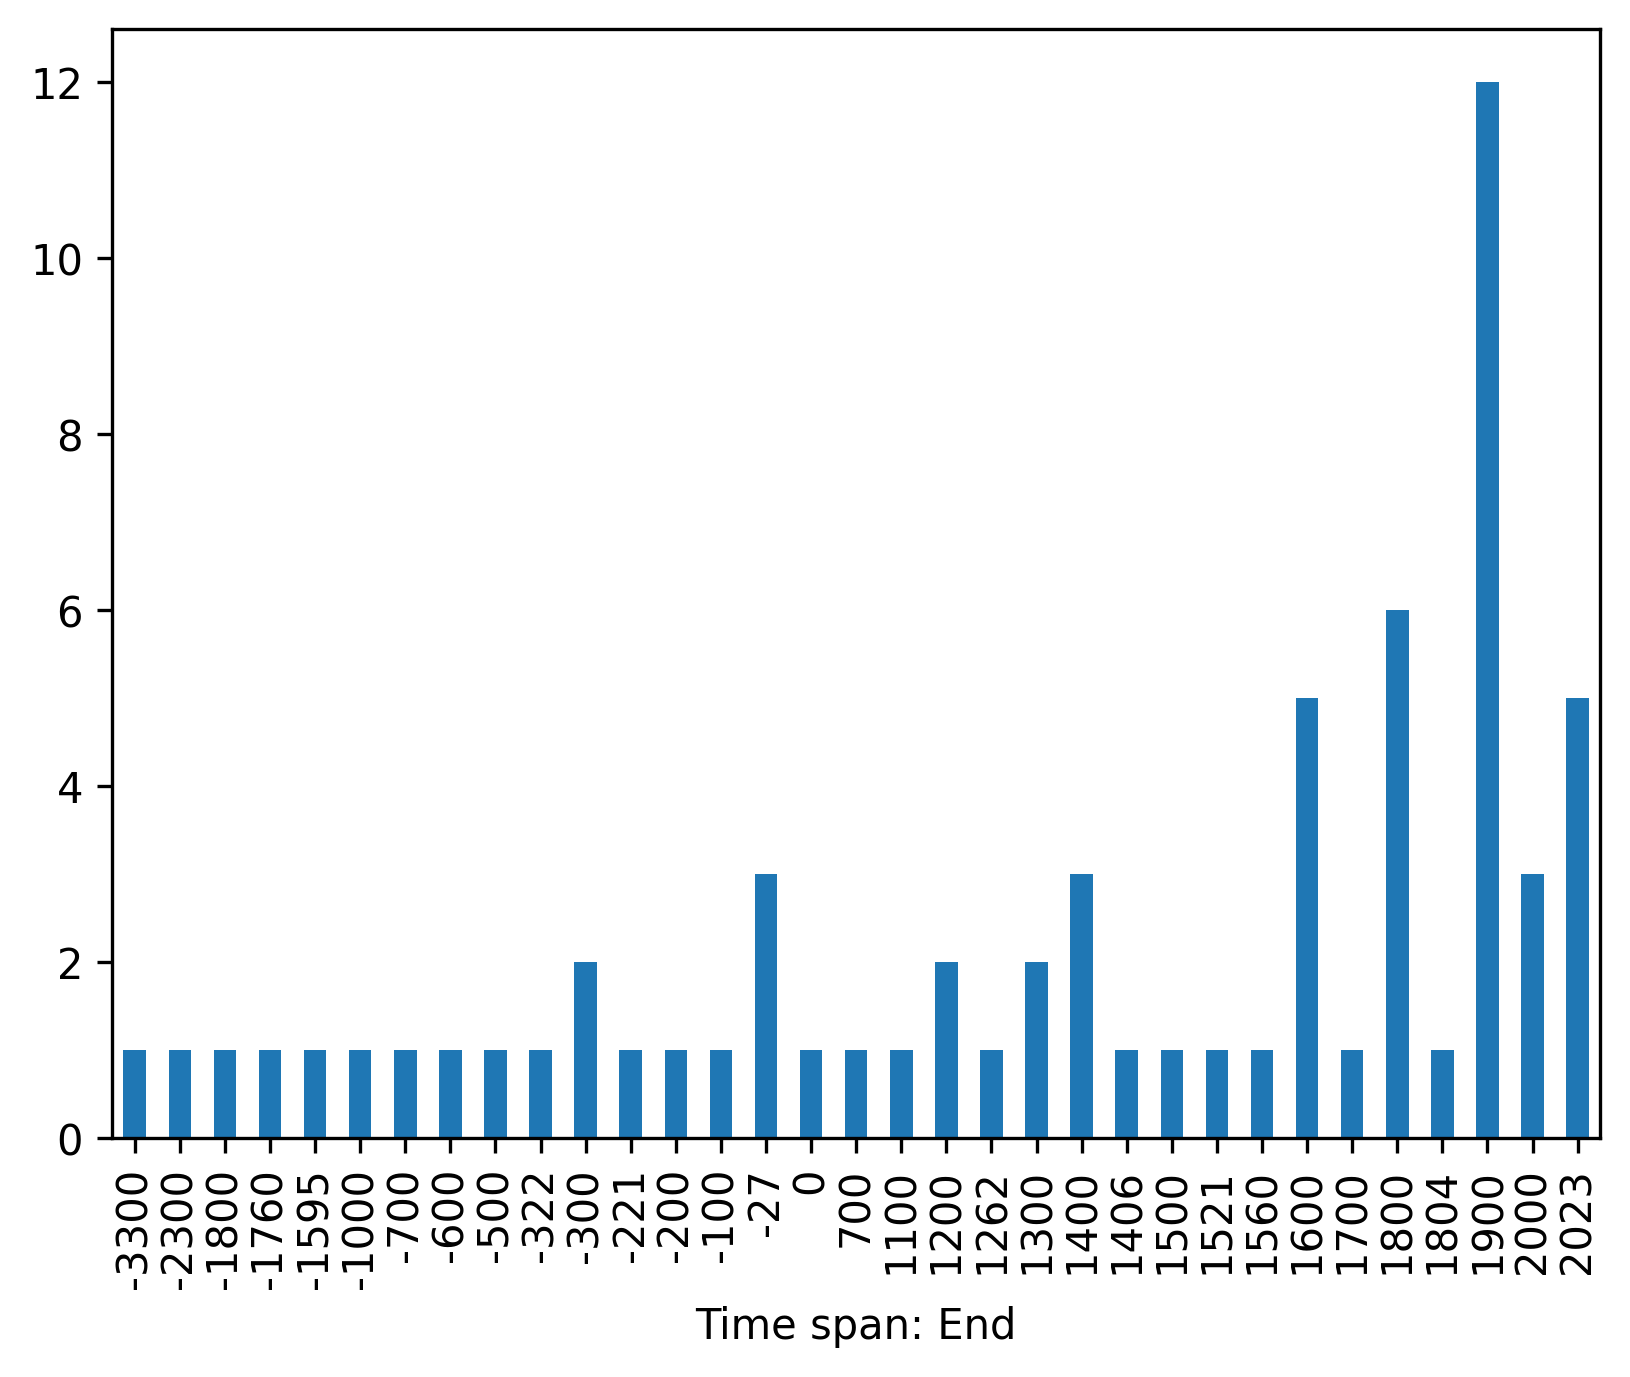

In [80]:
time_span_end_dates = gov_df['Time span: End'].unique()
time_span_end_dates_order = sorted(time_span_end_dates)

gov_df['Time span: End'].value_counts().loc[time_span_end_dates_order].plot.bar()

In [81]:
gov_df[['Time span: Start', 'Time span: End', 'Time span: Duration', 'Name']].head()

,Time span: Start,Time span: End,Time span: Duration,Name
0,1900,2023,123,!Kung San (Ju/hoansi)
1,-200,0,200,Aedui (Celtic Oppida)
2,1900,2023,123,Akha
3,300,1200,900,Amalfi
4,0,700,700,Arab nomads


In [82]:
dates_df = gov_df[['Time span: Start', 'Time span: Duration', 'Name']]

In [83]:
dates_df.head()

,Time span: Start,Time span: Duration,Name
0,1900,123,!Kung San (Ju/hoansi)
1,-200,200,Aedui (Celtic Oppida)
2,1900,123,Akha
3,300,900,Amalfi
4,0,700,Arab nomads


In [84]:
dates_tuples = [tuple(x) for x in dates_df.to_numpy()]

In [85]:
dates_tuples

[(1900, 123, '!Kung San (Ju/hoansi)'),
 (-200, 200, 'Aedui (Celtic Oppida)'),
 (1900, 123, 'Akha'),
 (300, 900, 'Amalfi'),
 (0, 700, 'Arab nomads'),
 (-1920, 120, 'Assur'),
 (-508, 186, 'Athens (Classical Period)'),
 (1100, 500, 'Aztec City-States'),
 (-900, 300, 'Babylonia'),
 (-400, 300, 'Carthage'),
 (900, 600, 'Central African communities'),
 (-771, 550, 'Chinese Warring States'),
 (-1200, 500, 'Circassians'),
 (1200, 200, 'Cologne'),
 (900, 300, 'Communes (Medieval Europe)'),
 (1500, 300, 'Dutch Republic'),
 (-2400, 100, 'Ebla '),
 (-2700, 1700, 'Egypt '),
 (400, 700, 'England (Anglo Saxon)'),
 (-600, 400, 'Etruscan Dodecapolis'),
 (1900, 100, 'G/wi'),
 (1300, 300, 'Genoa (doge)'),
 (1000, 300, 'Genoa (podesta)'),
 (-480, 453, 'Greek democracies'),
 (-480, 453, 'Greek oligarchies'),
 (1100, 700, 'Haudenosanee (Iroquois)'),
 (1450, 354, 'Hausa City-States'),
 (1900, 123, 'Hmong villages'),
 (1600, 100, 'Huron'),
 (930, 332, 'Iceland '),
 (900, 660, 'Igbo People'),
 (1400, 500, 'Ijo

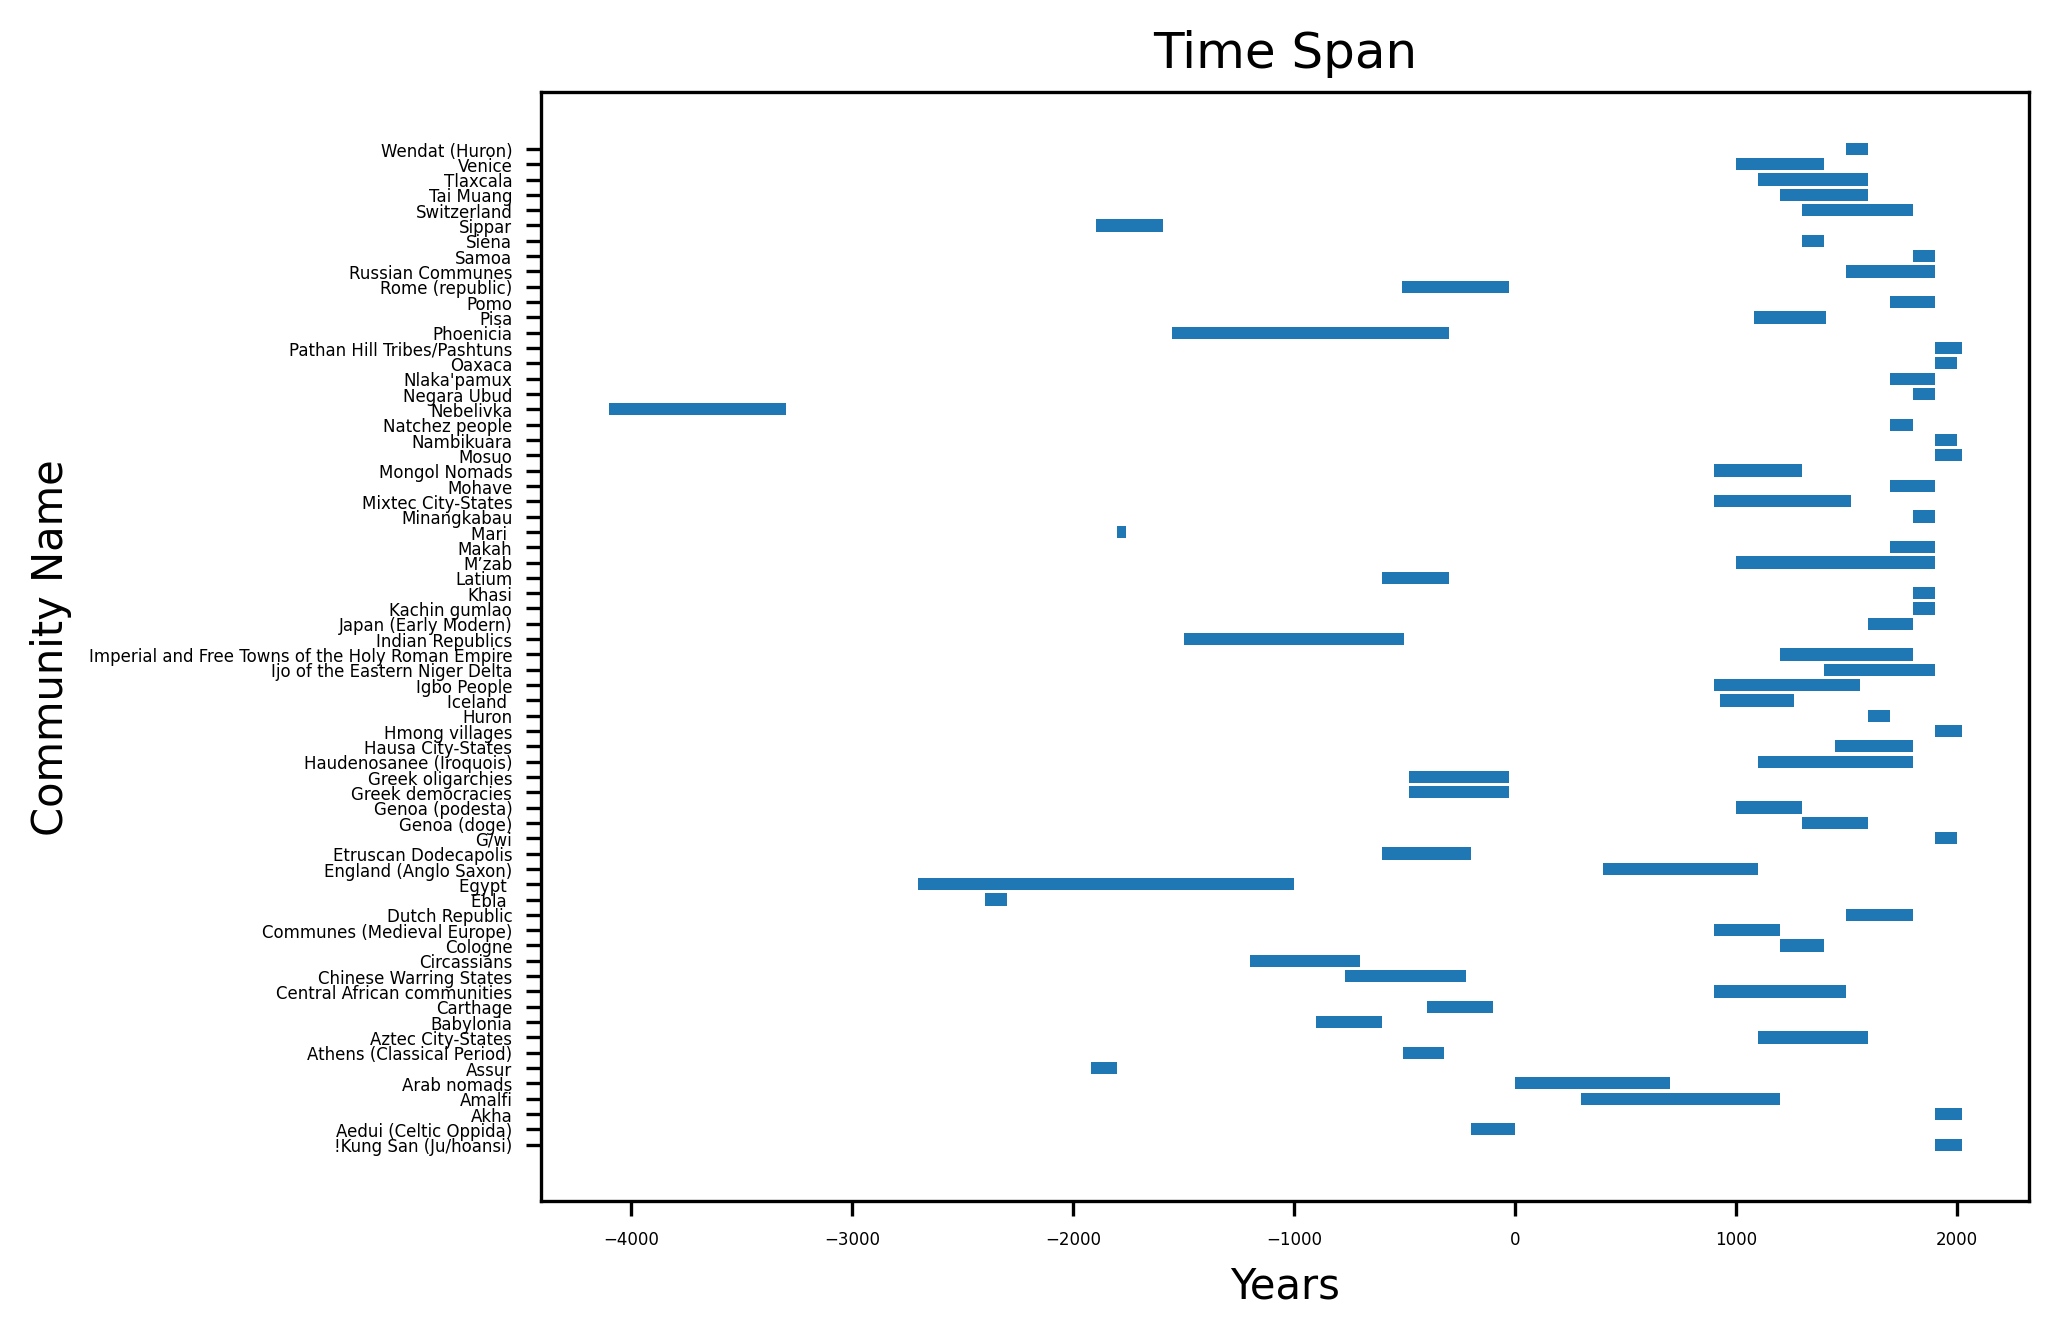

<Figure size 24000x24000 with 0 Axes>

<Figure size 1920x1440 with 0 Axes>

In [97]:
# create figure and plot
fig, ax = plt.subplots()
labels = []
for i, (start, duration, label) in enumerate(dates_tuples):
    labels.append(label)
    ax.broken_barh([(start, duration)], (i-0.4,0.8))

# set yticks at the middle of the bars
ax.set_yticks(range(len(dates_tuples)))
ax.set_yticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=4)

ax.set_xlabel('Years')
ax.set_ylabel('Community Name')

plt.title('Time Span')
# plt.grid(True)
plt.figure(figsize=(80, 80))

plt.show()
plt.savefig('fig/communities_timeline.png')

/ Notes / TODO:
- x Mechanisms, Institution, Culture/Norms etc. 
- x Plot time span 
- Cluster communities by similarity (PCA) - can check w Seth
- CGI-specific analyses 

/
- Address remaining questions in doc: https://docs.google.com/document/d/1f1Qa25OGWWrvK5xrZjuLeqYn4WkgnyUH/edit
- CGIs: 
  - what do CGIs look like? 
  - How are they connected with other institutions? 
  - How many cgis per community, on average? 
  - how many non cgis, on average? How many institutions per community, on average? 
  - Does the variation interact with size, time or space?
  - Identify patterns in terms of:
      - Functions of the CGI
      - Level of jurisdiction (local/central) and membership (elite/commoners)
      - Within a type of CGI (say, assembly), what are the main sources of variation in terms of function and membership?
      - Possible interactions with size
  
- Mechanisms:
  - How many mechanisms in CGIs, on average? 
  - how many mechanisms in the community? 
  - What mechanisms prevail? 
  - What mechanisms prevail in CGIs compared to non-CGIs?
  - Does the variation interact with size, time or space?
  
- Region:
  - can we identify any regional characteristics? 
  - We should also provide a simple breakdown of each of the three features (time, place, size). 
  - How many communities in each?

/
- CGI network structures?

### TODO 

1. Finish descriptive analysis 
- x CGI analysis -- histogram for mechanisms
- x Timeline plotting 
- x Geography mapping
- x Clean up + reformat size


2. Mechanisms analysis 
- Mechanisms x geography, mechanisms x time, mechanisms x size


3. CGI Analysis 
- CGI-mechanism histogram 
- CGI Mechanisms x geography, mechanisms x time, mechanisms x size
- Correlation matrices for mechanisms and CGI mechanisms


4. Similarity clustering 
- Similarity clustering for Communities 

# Pairplots

In [87]:
data_df = gov_df.select_dtypes(include=[np.number]).dropna()

In [88]:
# sns.pairplot(data_df)

## TODO: Clustering communities by similarity